In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.dates import DateFormatter
pd.options.mode.chained_assignment = None 

Functions

In [5]:
def plot_observed_vs_predicted_with_text(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    # plt.savefig(f'./plots/{site}_observed_vs_predicted.png')
def plot_observed_vs_predicted_with_text1(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # only for prediction
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    # plt.savefig(f'./plots/{site}_observed_vs_predicted.png')
def XGBoost_train_test(df,target_col, eta, max_depth, min_child_weight, gamma, alpha, params, plot_directory,site, L=3,test_size=0.2):

    # Create lag features for each feature column
    for column in df.columns[:-1]:
        if column not in ['day', 'month', 'latitude', 'longitude', 'elevation', 'canopy_height',
       'instrument_height', 'biom_croplands', 'biom_dbf', 'biom_enf',
       'biom_grasslands', 'winter', 'spring', 'summer', 'fall']:
            # for i in range(1, L + 1):
            # for i in range(0, L):
            for i in range(1, L):
                df[f'{column}_lag_{i}'] = df[column].shift(i)

    # Drop rows with NaNs resulting from lag creation
    df.dropna(inplace=True)

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Initialize XGBoost model
    model = XGBRegressor(eta=eta,
                            max_depth=max_depth,
                            min_child_weight=min_child_weight,
                            gamma=gamma, 
                            alpha=alpha)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted(y_test, y_pred, site)
    plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    return model, X_train, X_test, y_train, y_test, y_pred, mse,rmse,mae, test_r2
def XGBoost_train_test_cont(model,site, df,target_col, L=3,test_size=0.2):

    # Create lag features for each feature column
    for column in df.columns[:-1]:
        if column not in ['day', 'month', 'latitude', 'longitude', 'elevation', 'canopy_height',
       'instrument_height', 'biom_croplands', 'biom_dbf', 'biom_enf',
       'biom_grasslands', 'winter', 'spring', 'summer', 'fall']:
            # for i in range(1, L + 1):
            # for i in range(0, L):
            for i in range(1, L):
                df[f'{column}_lag_{i}'] = df[column].shift(i)

    # Drop rows with NaNs resulting from lag creation
    df.dropna(inplace=True)

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted(y_test, y_pred, site)
    # plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mape, test_r2)
    return model, X_train, X_test, y_train, y_test, y_pred, mse,rmse,mae, test_r2
def f_importance(model, X_train, site, params, plot_directory,  target_col = 'GPP_DT_VUT_USTAR50'):
    importance = model.feature_importances_
    importance_dict = {X_train.columns[i]: importance[i] for i in range(len(X_train.columns))}
    sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
    print(sorted_importance)
    # Plot feature importance
    plot_importance(model, max_num_features=15)  # Shows top 10 features
    plt.savefig(os.path.join(plot_directory,f"feature_importance_XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
def retrain_XGBOOST(files,columns, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory,params, directory_data = r"input\Preprocessed"):
    #############################################################################################

    print('First training and testing the model on the first site')
    # Load the data
    filename = files[0]
    data = pd.read_csv(os.path.join(directory_data, filename))   
    site0 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_0, X_train_0, X_test_0, y_train_0, y_test_0, y_pred_0, mse_0, rmse_0, mae_0, test_r2_0 = XGBoost_train_test(df,target_col, eta, max_depth, min_child_weight, gamma, alpha, params, plot_directory, site0, L,test_size=0.2)
    f_importance(model_0, X_train_0, site0, params, plot_directory)
    #############################################################################################
    print('Retraining the model on the second site')
    # Load the data
    filename = files[1]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site1 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_1, X_train_1, X_test_1, y_train_1, y_test_1, y_pred_1, mse_1, rmse_1, mae_1, test_r2_1 = XGBoost_train_test_cont(model_0,site1, df,target_col,L,test_size=0.2)
    f_importance(model_1, X_train_1, site1, params, plot_directory)

    # Retest the model on the first site
    print('Retesting the model on the first site')
    print(site0)
    # Make predictions on the test set
    y_pred = model_1.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site1)
    print('Mean Squared Error:', mse_1)
    print('Root Mean Squared Error:', rmse_1)
    print('MAE:', mae_1)
    print("Test R^2 Score:", test_r2_1)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse_1, rmse_1, mae_1, test_r2_1, params, target_col,plot_directory)
    #############################################################################################
    print('Retraining the model on the third site')

    # Load the data
    filename = files[2]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site2 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_2, X_train_2, X_test_2, y_train_2, y_test_2, y_pred_2, mse_2, rmse_2, mae_2, test_r2_2 = XGBoost_train_test_cont(model_1,site2, df,target_col,L,test_size=0.2)
    f_importance(model_2, X_train_2, site2, params, plot_directory) 

    # Retest the model on the first and second site
    # Make predictions on the test set
    print(site0)
    y_pred = model_2.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    print('Retesting the model on the first and second site')
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('mae:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site1)
    y_pred_1 = model_2.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    test_r2 = r2_score(y_test_1, y_pred_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site2)
    print('Mean Squared Error:', mse_2)
    print('Root Mean Squared Error:', rmse_2)
    print('MAE:', mae_2)
    print("Test R^2 Score:", test_r2_2)
    plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse_2, rmse_2, mae_2, test_r2_2, params, target_col,plot_directory)




    #############################################################################################
    print('Retraining the model on the fourth site')

    # Load the data
    filename = files[3]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site3 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    model_3, X_train_3, X_test_3, y_train_3, y_test_3, y_pred_3, mse_3, rmse_3, mae_3, test_r2_3 = XGBoost_train_test_cont(model_2,site3, df,target_col,L,test_size=0.2)
    f_importance(model_3, X_train_3, site3, params, plot_directory)
    mse_list.append(mse_3)
    rmse_list.append(rmse_3)
    mae_list.append(mae_3)
    r2_list.append(test_r2_3)
    # Retest the model on the first and second site
    # Make predictions on the test set
    print(site0)
    y_pred = model_2.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    print('Retesting the model on the first, second, and third site')
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site1)
    y_pred_1 = model_2.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    test_r2 = r2_score(y_test_1, y_pred_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, MAE, test_r2)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site2)
    y_pred_2 = model_2.predict(X_test_2)
    mse = mean_squared_error(y_test_2, y_pred_2)
    test_r2 = r2_score(y_test_2, y_pred_2)
    mae = mean_absolute_error(y_test_2, y_pred_2)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    # plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse, rmse, MAE, test_r2)
    plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site3)
    print('Mean Squared Error:', mse_3)
    print('Root Mean Squared Error:', rmse_3)
    print('MAE:', mae_3)
    print("Test R^2 Score:", test_r2_3)
    # plot_observed_vs_predicted_with_text(y_test_3, y_pred_3, site3, mse_3, rmse_3, mape_3, test_r2_3)
    plot_observed_vs_predicted_with_text(y_test_3, y_pred_3, site3, mse_3, rmse_3, mae_3, test_r2_3, params, target_col,plot_directory)

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))
    return model_3, X_test_0.columns
def test_predict(model, L, df, columns, target_col, site, plot_directory,params):
    # Create lag features for each feature column
    for column in df.columns[:-1]:
        if column not in ['day', 'month', 'latitude', 'longitude', 'elevation', 'canopy_height',
       'instrument_height', 'biom_croplands', 'biom_dbf', 'biom_enf',
       'biom_grasslands', 'winter', 'spring', 'summer', 'fall']:
            # for i in range(1, L + 1):
            # for i in range(0, L):
            for i in range(1, L):
                df[f'{column}_lag_{i}'] = df[column].shift(i)

    # Drop rows with NaNs resulting from lag creation
    df.dropna(inplace=True)

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)  
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", r2)

    plot_observed_vs_predicted_with_text1(y, y_pred, site, mse, rmse, mae, r2, params, target_col,plot_directory)
    return mse, rmse, mae, r2
def predict_all(model,params,L,column, plot_directory = r"plot\XGBOOST_retrain", directory_data = r"input\Preprocessed", target_col = 'GPP_DT_VUT_USTAR50'):
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    data1 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Fontainebleau-Barbeau_preprocessed_01012019_07092023.csv'))
    test1 = data1[column]
    # Assuming 'timestamp' is the index column
    test1['date'] = pd.to_datetime(test1['date'])
    test1.set_index('date', inplace=True)
    mse1, rmse1, mae1, r21 = test_predict(model, L, test1, column, target_col, 'Fontainebleau-Barbeau',plot_directory, params)
    mse_list.append(mse1)
    rmse_list.append(rmse1)
    mae_list.append(mae1)
    r2_list.append(r21)

    data2 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Grillenburg_preprocessed_24042017_28092023.csv'))
    test2 = data2[column]
    # Assuming 'timestamp' is the index column
    test2['date'] = pd.to_datetime(test2['date'])
    test2.set_index('date', inplace=True)
    mse2, rmse2, mae2, r22 = test_predict(model, L, test2, column, target_col, 'Grillenburg',plot_directory, params)
    mse_list.append(mse2)
    rmse_list.append(rmse2)
    mae_list.append(mae2)
    r2_list.append(r22)

    data3 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Klingenberg_preprocessed_01012018_25092023.csv'))
    test3 = data3[column]
    test3['date'] = pd.to_datetime(test3['date'])
    test3.set_index('date', inplace=True)
    mse3, rmse3, mae3, r23 = test_predict(model, L, test3, column, target_col, 'Klingenberg',plot_directory, params)    
    mse_list.append(mse3)
    rmse_list.append(rmse3)
    mae_list.append(mae3)
    r2_list.append(r23)


    data4 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Svartberget_preprocessed_01012019_21102023.csv'))
    test4 = data4[column]
    test4['date'] = pd.to_datetime(test4['date'])   
    test4.set_index('date', inplace=True)   
    mse4, rmse4, mae4, r24 = test_predict(model, L, test4, column, target_col, 'Svartberget',plot_directory, params)
    mse_list.append(mse4)   
    rmse_list.append(rmse4) 
    mae_list.append(mae4) 
    r2_list.append(r24) 

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))

# Only for 3 sites
def predict_all_3(model,params,L,column, plot_directory = r"plot\XGBOOST_retrain", directory_data = r"input\Preprocessed", target_col = 'GPP_DT_VUT_USTAR50'):
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    data1 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Fontainebleau-Barbeau_preprocessed_01012019_07092023.csv'))
    test1 = data1[column]
    # Assuming 'timestamp' is the index column
    test1['date'] = pd.to_datetime(test1['date'])
    test1.set_index('date', inplace=True)
    mse1, rmse1, mae1, r21 = test_predict(model, L, test1, column, target_col, 'Fontainebleau-Barbeau',plot_directory, params)
    mse_list.append(mse1)
    rmse_list.append(rmse1)
    mae_list.append(mae1)
    r2_list.append(r21)

    data2 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Grillenburg_preprocessed_24042017_28092023.csv'))
    test2 = data2[column]
    # Assuming 'timestamp' is the index column
    test2['date'] = pd.to_datetime(test2['date'])
    test2.set_index('date', inplace=True)
    mse2, rmse2, mae2, r22 = test_predict(model, L, test2, column, target_col, 'Grillenburg',plot_directory, params)
    mse_list.append(mse2)
    rmse_list.append(rmse2)
    mae_list.append(mae2)
    r2_list.append(r22)



    data4 = pd.read_csv(os.path.join(directory_data,'testing_sites', 'Svartberget_preprocessed_01012019_21102023.csv'))
    test4 = data4[column]
    test4['date'] = pd.to_datetime(test4['date'])   
    test4.set_index('date', inplace=True)   
    mse4, rmse4, mae4, r24 = test_predict(model, L, test4, column, target_col, 'Svartberget',plot_directory, params)
    mse_list.append(mse4)   
    rmse_list.append(rmse4) 
    mae_list.append(mae4) 
    r2_list.append(r24) 

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))
def retrain_XGBOOST_3(files,columns, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory,params,  directory_data = r"input\Preprocessed"):
    #############################################################################################

    print('First training and testing the model on the first site')
    # Load the data
    filename = files[0]
    data = pd.read_csv(os.path.join(directory_data, filename))   
    site0 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_0, X_train_0, X_test_0, y_train_0, y_test_0, y_pred_0, mse_0, rmse_0, mae_0, test_r2_0 = XGBoost_train_test(df,target_col, eta, max_depth, min_child_weight, gamma, alpha, params, plot_directory, site0, L,test_size=0.2)
    f_importance(model_0, X_train_0, site0, params, plot_directory)
    #############################################################################################
    print('Retraining the model on the second site')
    # Load the data
    filename = files[1]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site1 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    model_1, X_train_1, X_test_1, y_train_1, y_test_1, y_pred_1, mse_1, rmse_1, mae_1, test_r2_1 = XGBoost_train_test_cont(model_0,site1, df,target_col,L,test_size=0.2)
    f_importance(model_1, X_train_1, site1, params, plot_directory)

    # Retest the model on the first site
    print('Retesting the model on the first site')
    print(site0)
    # Make predictions on the test set
    y_pred = model_1.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    print(site1)
    print('Mean Squared Error:', mse_1)
    print('Root Mean Squared Error:', rmse_1)
    print('MAE:', mae_1)
    print("Test R^2 Score:", test_r2_1)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse_1, rmse_1, mae_1, test_r2_1, params, target_col,plot_directory)
    #############################################################################################
    print('Retraining the model on the third site')

    # Load the data
    filename = files[2]
    data = pd.read_csv(os.path.join(directory_data, filename)) 
    site2 = filename.split('_')[0]
    df = data[columns]
    # Assuming 'timestamp' is the index column
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]

    model_2, X_train_2, X_test_2, y_train_2, y_test_2, y_pred_2, mse_2, rmse_2, mae_2, test_r2_2 = XGBoost_train_test_cont(model_1,site2, df,target_col,L,test_size=0.2)
    f_importance(model_2, X_train_2, site2, params, plot_directory) 

    # Retest the model on the first and second site
    # Make predictions on the test set
    print(site0)
    y_pred = model_2.predict(X_test_0)
    # Calculate Mean Squared Error (MSE)
    print('Retesting the model on the first and second site')
    mse = mean_squared_error(y_test_0, y_pred)
    test_r2 = r2_score(y_test_0, y_pred)
    mae = mean_absolute_error(y_test_0, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('mae:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site1)
    y_pred_1 = model_2.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred_1)
    test_r2 = r2_score(y_test_1, y_pred_1)
    mae = mean_absolute_error(y_test_1, y_pred_1)
    rmse = np.sqrt(mse)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)
    plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    print(site2)
    print('Mean Squared Error:', mse_2)
    print('Root Mean Squared Error:', rmse_2)
    print('MAE:', mae_2)
    print("Test R^2 Score:", test_r2_2)
    plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse_2, rmse_2, mae_2, test_r2_2, params, target_col,plot_directory)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)




    # #############################################################################################
    # print('Retraining the model on the fourth site')

    # # Load the data
    # filename = files[3]
    # data = pd.read_csv(os.path.join(directory_data, filename)) 
    # site3 = filename.split('_')[0]
    # df = data[columns]
    # # Assuming 'timestamp' is the index column
    # df['date'] = pd.to_datetime(df['date'])
    # df.set_index('date', inplace=True)

    # mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    # model_3, X_train_3, X_test_3, y_train_3, y_test_3, y_pred_3, mse_3, rmse_3, mae_3, test_r2_3 = XGBoost_train_test_cont(model_2,site3, df,target_col,L,test_size=0.2)
    # f_importance(model_3, X_train_3, site3, params, plot_directory)
    # mse_list.append(mse_3)
    # rmse_list.append(rmse_3)
    # mae_list.append(mae_3)
    # r2_list.append(test_r2_3)
    # # Retest the model on the first and second site
    # # Make predictions on the test set
    # print(site0)
    # y_pred = model_2.predict(X_test_0)
    # # Calculate Mean Squared Error (MSE)
    # print('Retesting the model on the first, second, and third site')
    # mse = mean_squared_error(y_test_0, y_pred)
    # test_r2 = r2_score(y_test_0, y_pred)
    # mae = mean_absolute_error(y_test_0, y_pred)
    # rmse = np.sqrt(mse)
    # print('Mean Squared Error:', mse)
    # print('Root Mean Squared Error:', rmse)
    # print('MAE:', mae)
    # print("Test R^2 Score:", test_r2)
    # # plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2)
    # plot_observed_vs_predicted_with_text(y_test_0, y_pred, site0, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    
    # mse_list.append(mse)
    # rmse_list.append(rmse)
    # mae_list.append(mae)
    # r2_list.append(test_r2)

    # print(site1)
    # y_pred_1 = model_2.predict(X_test_1)
    # mse = mean_squared_error(y_test_1, y_pred_1)
    # test_r2 = r2_score(y_test_1, y_pred_1)
    # mae = mean_absolute_error(y_test_1, y_pred_1)
    # rmse = np.sqrt(mse)
    # print('Mean Squared Error:', mse)
    # print('Root Mean Squared Error:', rmse)
    # print('MAE:', mae)
    # print("Test R^2 Score:", test_r2)
    # # plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, MAE, test_r2)
    # plot_observed_vs_predicted_with_text(y_test_1, y_pred_1, site1, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    # mse_list.append(mse)
    # rmse_list.append(rmse)
    # mae_list.append(mae)
    # r2_list.append(test_r2)

    # print(site2)
    # y_pred_2 = model_2.predict(X_test_2)
    # mse = mean_squared_error(y_test_2, y_pred_2)
    # test_r2 = r2_score(y_test_2, y_pred_2)
    # mae = mean_absolute_error(y_test_2, y_pred_2)
    # rmse = np.sqrt(mse)
    # print('Mean Squared Error:', mse)
    # print('Root Mean Squared Error:', rmse)
    # print('MAE:', mae)
    # print("Test R^2 Score:", test_r2)
    # # plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse, rmse, MAE, test_r2)
    # plot_observed_vs_predicted_with_text(y_test_2, y_pred_2, site2, mse, rmse, mae, test_r2, params, target_col,plot_directory)
    # mse_list.append(mse)
    # rmse_list.append(rmse)
    # mae_list.append(mae)
    # r2_list.append(test_r2)

    # print(site3)
    # print('Mean Squared Error:', mse_3)
    # print('Root Mean Squared Error:', rmse_3)
    # print('MAE:', mae_3)
    # print("Test R^2 Score:", test_r2_3)
    # # plot_observed_vs_predicted_with_text(y_test_3, y_pred_3, site3, mse_3, rmse_3, mape_3, test_r2_3)
    # plot_observed_vs_predicted_with_text(y_test_3, y_pred_3, site3, mse_3, rmse_3, mae_3, test_r2_3, params, target_col,plot_directory)

    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))
    return model_2, X_test_0.columns

In [6]:
plot_directory = r"plot\XGBOOST_retrain"
directory_data = r"input\Preprocessed"

files = os.listdir(directory_data)
target_col = 'GPP_DT_VUT_USTAR50'
col2 = ['date','CLr', 'EVI', 'EVI2', 'LSWI',  'MNDVI', 'MNDWI', 'NDII', 'NDVI', 'H_F_MDS', 'LE_F_MDS',  'LW_IN_F', 'PA_F', 'P_F', 'SW_IN_F', 'TA_F', 'VPD_F', 'WS_F', target_col]
col_general = ['date','latitude', 'longitude', 'elevation', 'canopy_height', 'instrument_height', 'biom_croplands', 'biom_dbf', 'biom_enf', 'biom_grasslands', 'winter',
               'spring', 'summer', 'fall','CLr', 'EVI', 'EVI2', 'LSWI',  'MNDVI', 'MNDWI', 'NDII', 'NDVI', 'H_F_MDS', 'LE_F_MDS',  'LW_IN_F', 'PA_F', 'P_F', 'SW_IN_F', 
               'TA_F', 'VPD_F', 'WS_F', target_col]

Retrain 3 sites

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1_L_5
First training and testing the model on the first site
Mean Squared Error: 3.2309317928464387
Root Mean Squared Error: 1.7974792885723159
MAE: 1.1698976412529667
Test R^2 Score: 0.8908463929140585


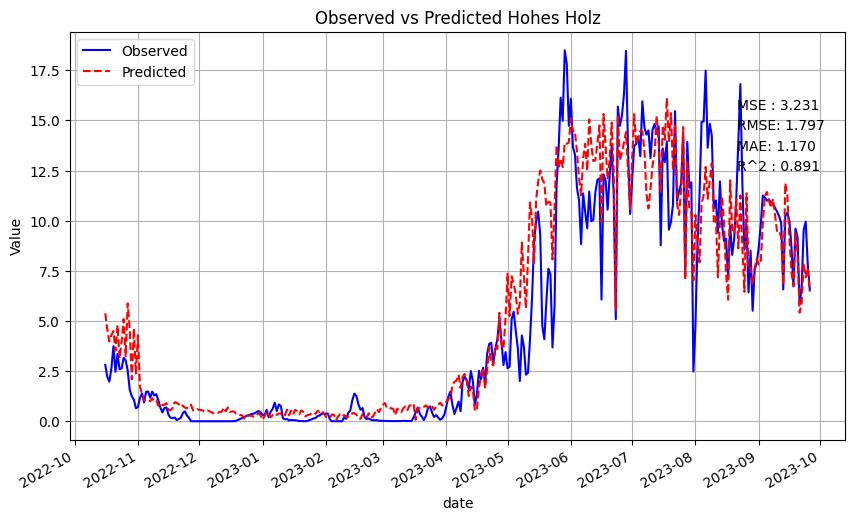

[('LE_F_MDS', 0.45457795), ('EVI2_lag_1', 0.065680616), ('LE_F_MDS_lag_3', 0.053314924), ('EVI', 0.045494057), ('SW_IN_F', 0.03996278), ('LSWI', 0.03299866), ('LE_F_MDS_lag_2', 0.022927372), ('EVI_lag_4', 0.017259302), ('LSWI_lag_3', 0.014410694), ('EVI2', 0.011987579), ('H_F_MDS_lag_4', 0.008435284), ('H_F_MDS', 0.008415094), ('NDII_lag_1', 0.008176291), ('MNDWI_lag_2', 0.007892476), ('H_F_MDS_lag_3', 0.007691132), ('NDII_lag_4', 0.0075869844), ('NDVI_lag_3', 0.007415443), ('NDII', 0.0073430627), ('LE_F_MDS_lag_4', 0.00718385), ('MNDWI_lag_1', 0.0071418034), ('NDVI_lag_4', 0.006879423), ('VPD_F', 0.0060212743), ('NDVI_lag_1', 0.005382438), ('LSWI_lag_1', 0.0051316223), ('EVI_lag_3', 0.0050652646), ('MNDVI', 0.0050021107), ('TA_F_lag_3', 0.0044356813), ('MNDVI_lag_2', 0.0042595053), ('EVI2_lag_3', 0.0041802763), ('CLr_lag_3', 0.004137076), ('MNDVI_lag_1', 0.0038376315), ('VPD_F_lag_1', 0.003605907), ('MNDVI_lag_4', 0.0035686286), ('H_F_MDS_lag_2', 0.0035593002), ('LW_IN_F', 0.003524408

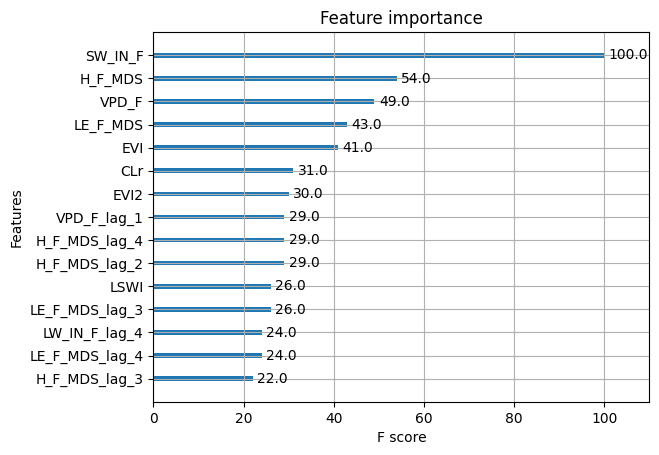

Retraining the model on the second site
Mean Squared Error: 1.0354483802963281
Root Mean Squared Error: 1.0175698405005567
MAE: 0.5861241015185262
Test R^2 Score: 0.8818497661044075
[('CLr', 0.5308976), ('LE_F_MDS', 0.09950639), ('LE_F_MDS_lag_4', 0.025698015), ('MNDVI', 0.01915283), ('SW_IN_F', 0.014785028), ('MNDWI_lag_1', 0.014454928), ('NDVI_lag_4', 0.011595109), ('EVI', 0.010179486), ('CLr_lag_4', 0.0101044895), ('CLr_lag_1', 0.008864086), ('NDVI', 0.0084031625), ('MNDWI_lag_3', 0.008347098), ('NDII_lag_2', 0.00810241), ('EVI2', 0.007951391), ('MNDWI_lag_2', 0.0077875713), ('P_F_lag_4', 0.007503397), ('MNDVI_lag_1', 0.0068631927), ('NDII', 0.0067538903), ('TA_F', 0.0066642133), ('MNDWI', 0.0065339585), ('EVI2_lag_2', 0.006232212), ('LSWI_lag_1', 0.0061676414), ('H_F_MDS', 0.0055597182), ('LSWI', 0.0053302874), ('EVI_lag_1', 0.0052597714), ('LSWI_lag_3', 0.005246479), ('PA_F', 0.005167632), ('NDVI_lag_1', 0.0047519878), ('MNDVI_lag_4', 0.0045834663), ('SW_IN_F_lag_3', 0.0044187675)

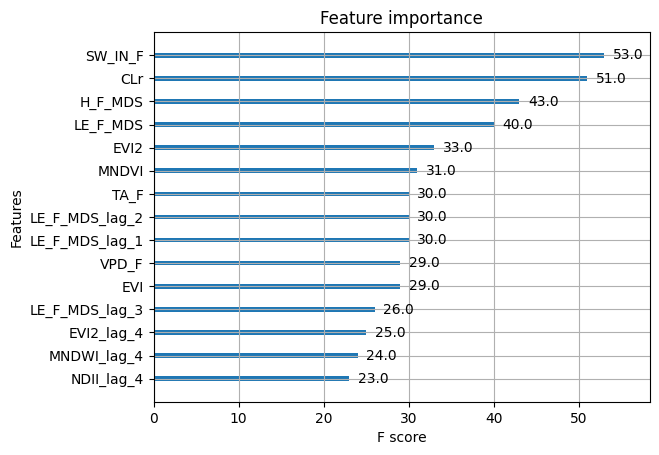

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 7.044350813723081
Root Mean Squared Error: 2.6541195929579136
MAE: 1.9566714539039933
Test R^2 Score: 0.7620140720398035


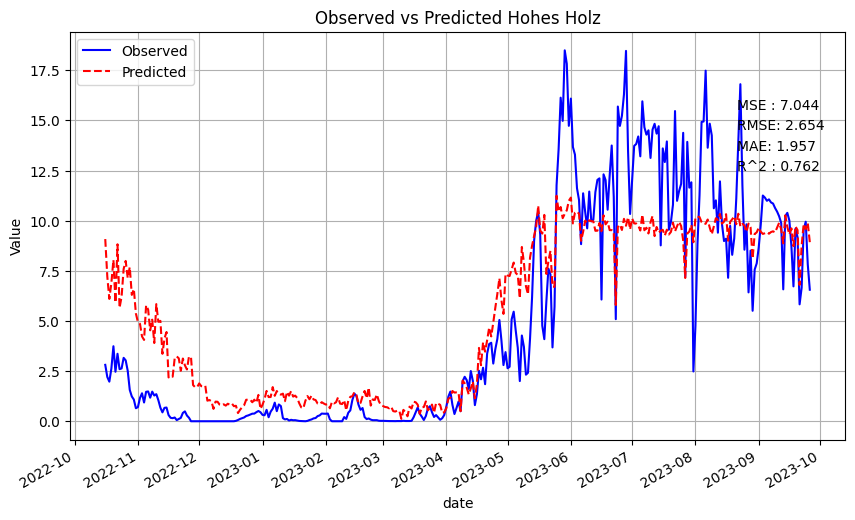

Torgnon
Mean Squared Error: 1.0354483802963281
Root Mean Squared Error: 1.0175698405005567
MAE: 0.5861241015185262
Test R^2 Score: 0.8818497661044075


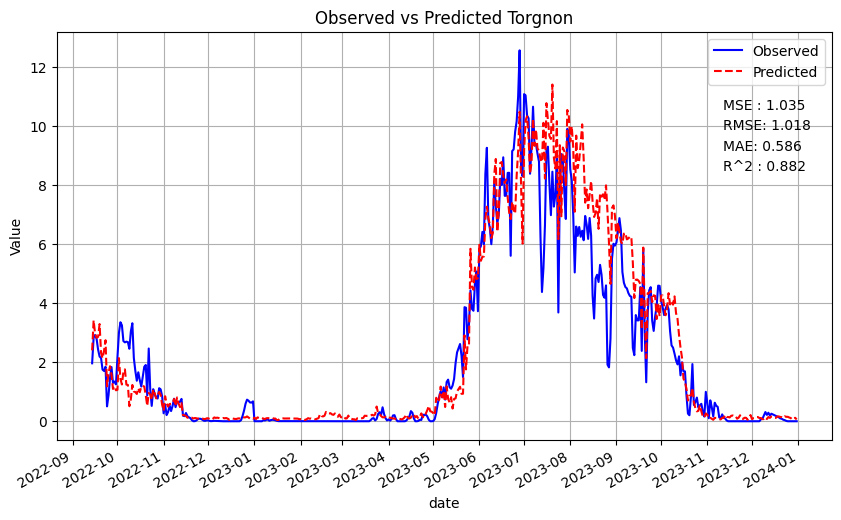

Retraining the model on the third site
Mean Squared Error: 1.1461970795913314
Root Mean Squared Error: 1.0706059403867192
MAE: 0.6638828060183026
Test R^2 Score: 0.8962660833565838
[('TA_F', 0.3477239), ('TA_F_lag_1', 0.1912164), ('TA_F_lag_4', 0.093197234), ('MNDVI', 0.052127928), ('TA_F_lag_2', 0.03458341), ('SW_IN_F', 0.034437444), ('LE_F_MDS', 0.028226603), ('CLr_lag_4', 0.018548196), ('CLr_lag_3', 0.014316784), ('MNDVI_lag_4', 0.012052559), ('VPD_F', 0.009530329), ('NDVI_lag_1', 0.008082906), ('CLr_lag_2', 0.0070931544), ('LSWI', 0.00579112), ('LW_IN_F_lag_2', 0.005445865), ('CLr_lag_1', 0.005214915), ('LSWI_lag_4', 0.004781042), ('SW_IN_F_lag_4', 0.0047189915), ('CLr', 0.0043988647), ('EVI2_lag_4', 0.003970076), ('MNDWI', 0.003838156), ('EVI', 0.00373046), ('LE_F_MDS_lag_4', 0.0036983707), ('LE_F_MDS_lag_2', 0.0036768764), ('NDVI_lag_2', 0.003586574), ('EVI2_lag_1', 0.0034675484), ('LSWI_lag_1', 0.003284447), ('NDII', 0.003230971), ('LSWI_lag_3', 0.003085542), ('H_F_MDS', 0.00305

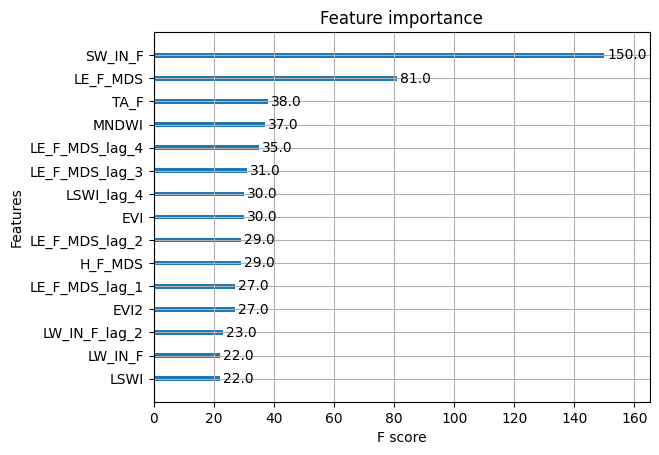

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 6.392875522505844
Root Mean Squared Error: 2.528413637541501
mae: 1.7972201343336667
Test R^2 Score: 0.7840234744422842


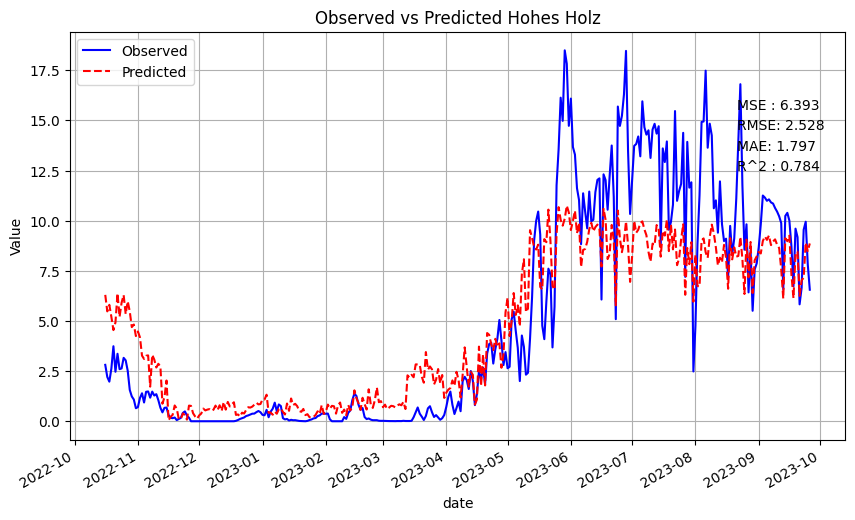

Torgnon
Mean Squared Error: 1.9876067368234545
Root Mean Squared Error: 1.4098250731290938
MAE: 1.077782998667483
Test R^2 Score: 0.7732033722618405


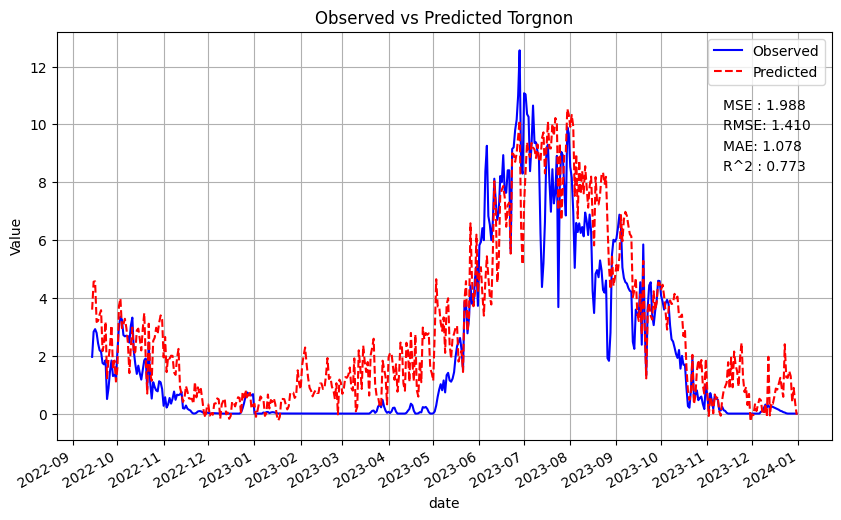

Hyytiala
Mean Squared Error: 1.1461970795913314
Root Mean Squared Error: 1.0706059403867192
MAE: 0.6638828060183026
Test R^2 Score: 0.8962660833565838


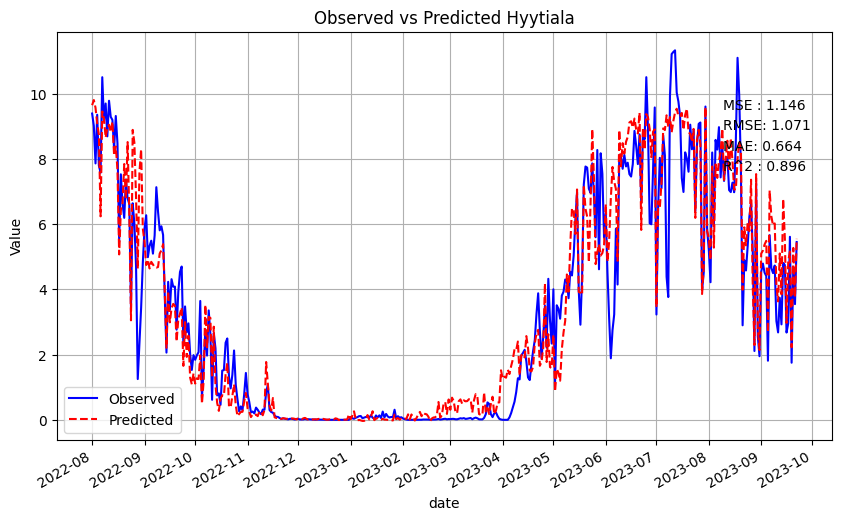

average MSE 3.4560296653842513
average RMSE 1.7826879279332293
average MAE 1.3175953772228775
average R2 0.776810072988655
Mean Squared Error: 5.2195083189560005
Root Mean Squared Error: 2.2846243277519394
MAE: 1.7052134868950815
Test R^2 Score: 0.7529765202824721


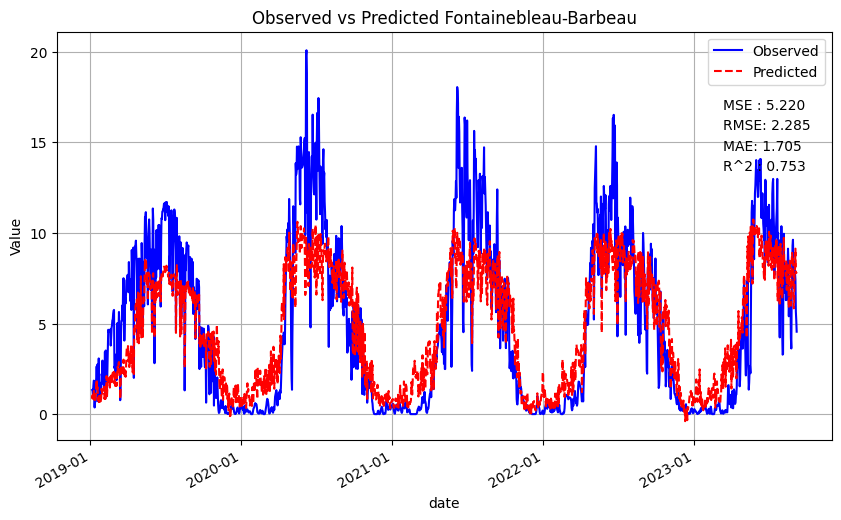

Mean Squared Error: 5.737907885112456
Root Mean Squared Error: 2.3953930544093294
MAE: 1.693880853430192
Test R^2 Score: 0.6171961658290377


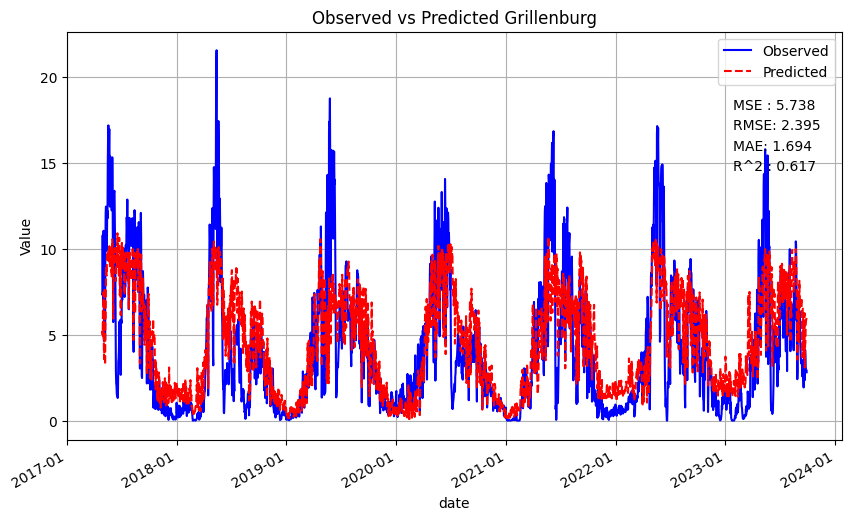

Mean Squared Error: 1.8724242897449048
Root Mean Squared Error: 1.368365554135628
MAE: 0.8839389400033311
Test R^2 Score: 0.842111511583598


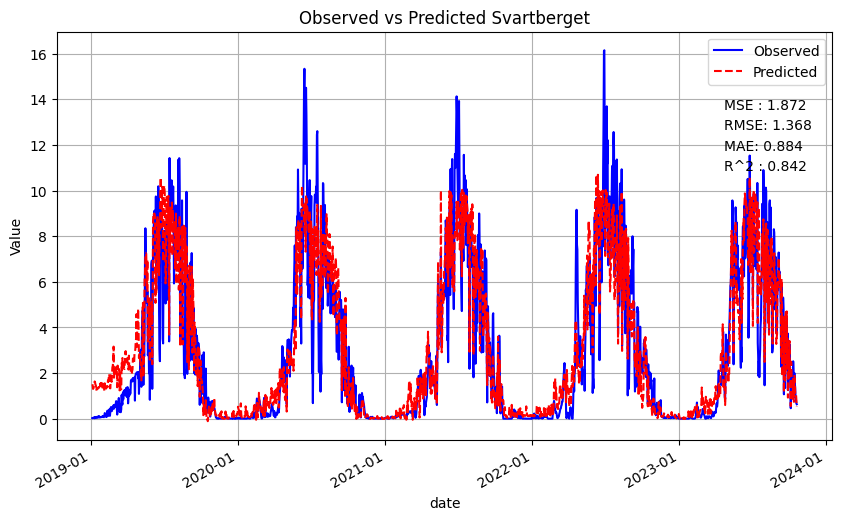

average MSE 4.276613497937787
average RMSE 2.016127645432299
average MAE 1.4276777601095347
average R2 0.7374280658983693


In [7]:
# Columns used for features
column = col2

# Parameters needed for XGBOOST
# Number of lag features
L = 5  
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}_L_{L}"
print(params)
model, features = retrain_XGBOOST_3(files,column, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all_3(model,params,L,column)

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1_L_5
First training and testing the model on the first site
Mean Squared Error: 3.031081357130977
Root Mean Squared Error: 1.7410001025648956
MAE: 1.1408278184132254
Test R^2 Score: 0.8975981281207066


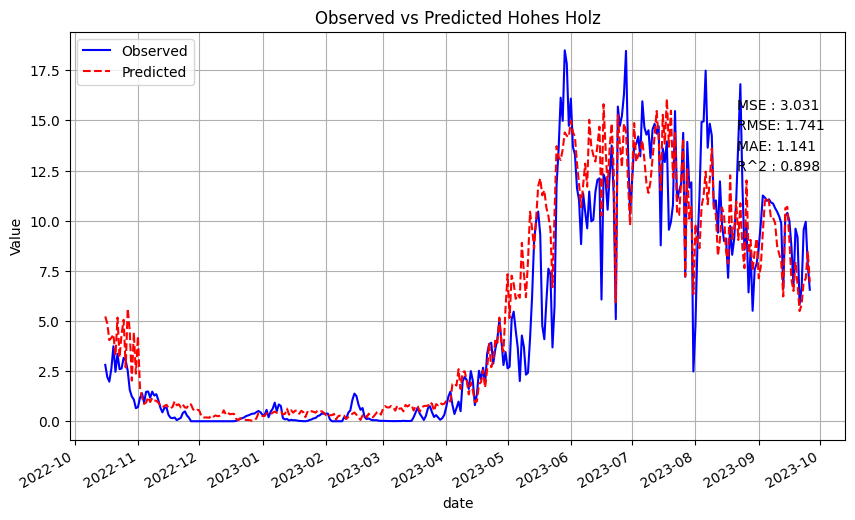

[('LE_F_MDS', 0.43509555), ('EVI2_lag_1', 0.066355385), ('EVI', 0.04445842), ('fall', 0.043572657), ('SW_IN_F', 0.038222708), ('LE_F_MDS_lag_3', 0.029863877), ('LSWI', 0.02845436), ('LE_F_MDS_lag_2', 0.025130989), ('NDII', 0.0141784735), ('EVI2', 0.011771101), ('NDII_lag_2', 0.008401199), ('LSWI_lag_3', 0.008317275), ('H_F_MDS', 0.008097194), ('summer', 0.0073425747), ('spring', 0.0073275957), ('NDII_lag_1', 0.0071020206), ('LE_F_MDS_lag_4', 0.0066276095), ('NDVI_lag_3', 0.0065844767), ('H_F_MDS_lag_3', 0.0063925064), ('VPD_F', 0.0062999483), ('LSWI_lag_1', 0.0062449044), ('EVI_lag_1', 0.005883799), ('LSWI_lag_2', 0.00578594), ('H_F_MDS_lag_4', 0.005693709), ('NDVI_lag_2', 0.005636861), ('NDVI_lag_4', 0.005488703), ('EVI2_lag_2', 0.0052697714), ('NDVI', 0.0052477606), ('EVI2_lag_3', 0.0050696954), ('MNDWI_lag_1', 0.004884129), ('CLr', 0.004739481), ('CLr_lag_2', 0.0046728626), ('NDII_lag_4', 0.0046339217), ('TA_F_lag_2', 0.0044016247), ('MNDVI', 0.004351525), ('MNDVI_lag_1', 0.00422786

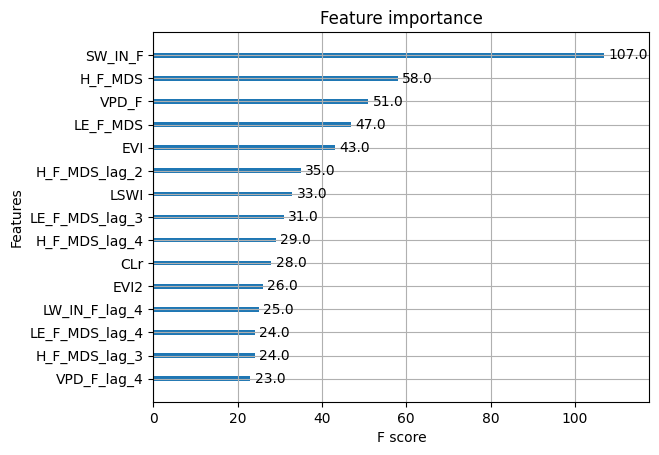

Retraining the model on the second site
Mean Squared Error: 1.0467921994619496
Root Mean Squared Error: 1.0231286329010392
MAE: 0.585763625711768
Test R^2 Score: 0.8805553752750898
[('CLr', 0.50969654), ('LE_F_MDS', 0.09113358), ('MNDVI', 0.028618203), ('MNDVI_lag_1', 0.027077379), ('LE_F_MDS_lag_4', 0.02116374), ('fall', 0.014937773), ('SW_IN_F', 0.013907312), ('EVI', 0.01188406), ('NDVI_lag_1', 0.011584234), ('NDVI_lag_4', 0.010376034), ('MNDWI_lag_2', 0.010056663), ('NDII_lag_2', 0.009485113), ('CLr_lag_4', 0.009445069), ('MNDVI_lag_4', 0.009224699), ('EVI2', 0.009162926), ('CLr_lag_1', 0.008744412), ('MNDWI_lag_1', 0.007952242), ('NDVI', 0.0071098306), ('EVI2_lag_2', 0.0064940634), ('P_F_lag_3', 0.006394811), ('H_F_MDS', 0.0063626827), ('MNDWI', 0.00612918), ('TA_F', 0.005797764), ('PA_F_lag_2', 0.005793946), ('NDII', 0.0055356803), ('LSWI_lag_3', 0.0051717726), ('LE_F_MDS_lag_1', 0.0051214993), ('SW_IN_F_lag_3', 0.0046625077), ('LSWI_lag_1', 0.0046152077), ('PA_F', 0.0045619486), 

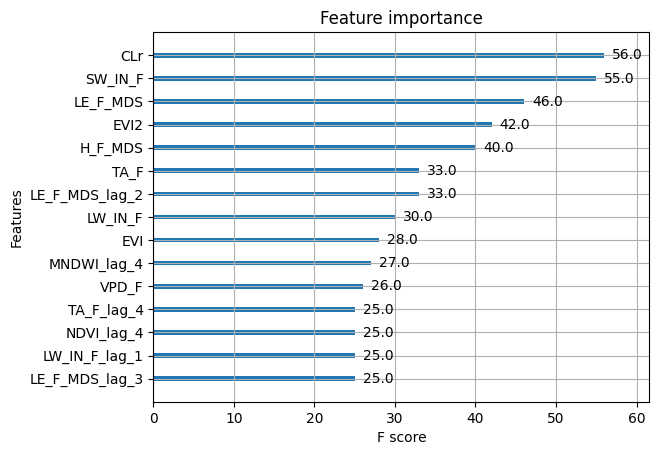

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 7.101066618182018
Root Mean Squared Error: 2.664782658713843
MAE: 1.9962989778078708
Test R^2 Score: 0.7600979886829278


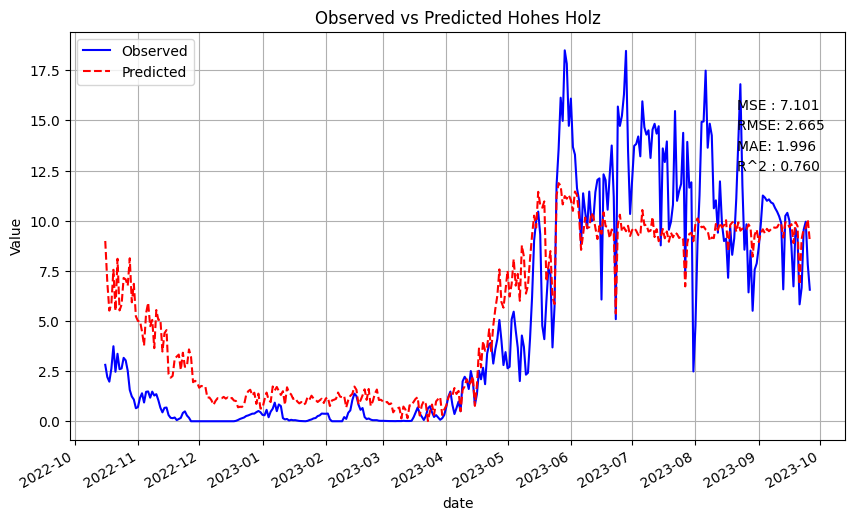

Torgnon
Mean Squared Error: 1.0467921994619496
Root Mean Squared Error: 1.0231286329010392
MAE: 0.585763625711768
Test R^2 Score: 0.8805553752750898


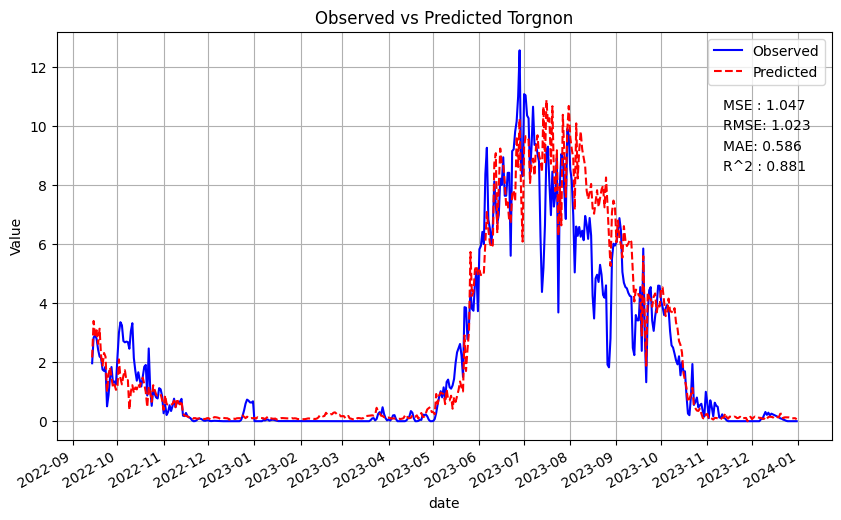

Retraining the model on the third site
Mean Squared Error: 1.1344391287770847
Root Mean Squared Error: 1.0651005251980137
MAE: 0.6615034832163347
Test R^2 Score: 0.8973302095102618
[('TA_F', 0.35670227), ('TA_F_lag_1', 0.17475922), ('summer', 0.08497182), ('TA_F_lag_4', 0.054991674), ('MNDVI', 0.03772882), ('SW_IN_F', 0.031178951), ('LE_F_MDS', 0.025257343), ('TA_F_lag_2', 0.024571747), ('TA_F_lag_3', 0.020874334), ('CLr_lag_4', 0.01654706), ('VPD_F', 0.012679953), ('CLr_lag_3', 0.0115252165), ('CLr_lag_2', 0.007676596), ('LSWI', 0.0058067883), ('SW_IN_F_lag_4', 0.005239786), ('LSWI_lag_4', 0.0047899634), ('NDVI_lag_1', 0.0046468694), ('MNDWI', 0.0045256815), ('CLr_lag_1', 0.004245012), ('EVI', 0.0040784967), ('CLr', 0.003546477), ('LE_F_MDS_lag_4', 0.003429091), ('EVI_lag_2', 0.0033716513), ('EVI2', 0.0032999334), ('H_F_MDS', 0.0032789789), ('LE_F_MDS_lag_2', 0.0032717113), ('LSWI_lag_3', 0.0032119076), ('NDVI_lag_2', 0.0031987089), ('LW_IN_F_lag_2', 0.0031312727), ('fall', 0.00312231

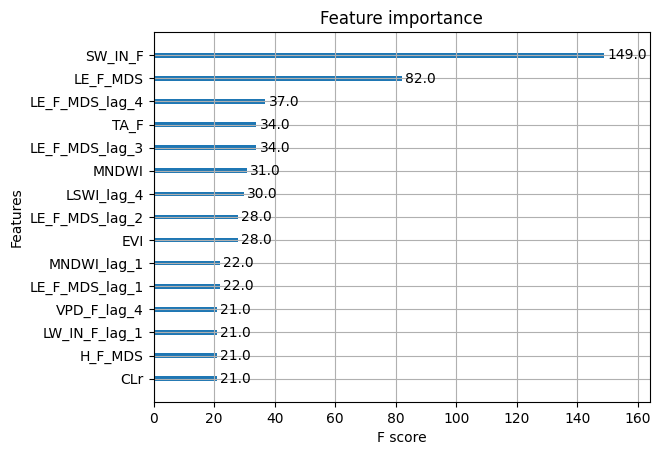

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 7.618491357356511
Root Mean Squared Error: 2.7601614730585076
mae: 1.9845113892349644
Test R^2 Score: 0.7426173421395846


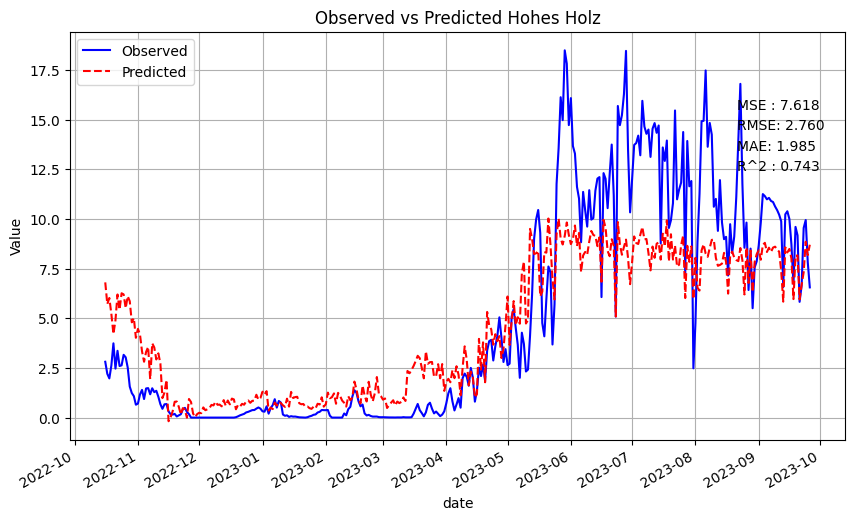

Torgnon
Mean Squared Error: 1.968742905699051
Root Mean Squared Error: 1.4031189919957079
MAE: 1.093498898046552
Test R^2 Score: 0.7753558369350455


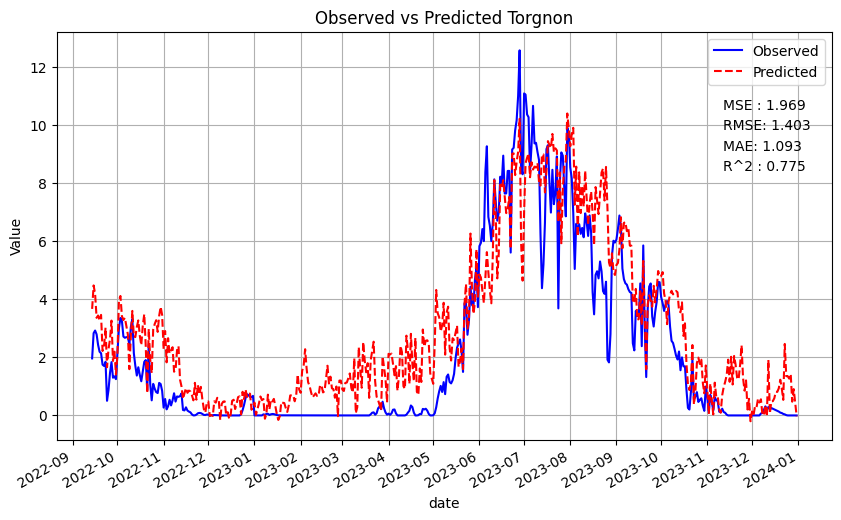

Hyytiala
Mean Squared Error: 1.1344391287770847
Root Mean Squared Error: 1.0651005251980137
MAE: 0.6615034832163347
Test R^2 Score: 0.8973302095102618


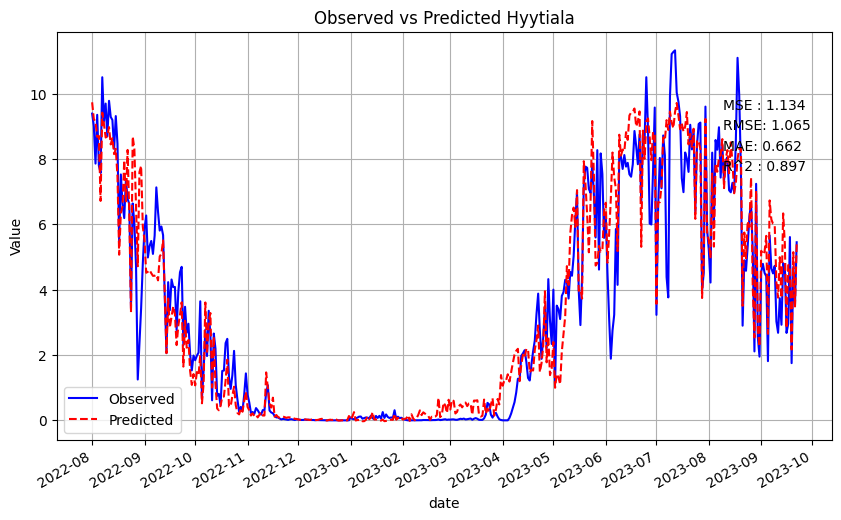

average MSE 3.8519923895848707
average RMSE 1.8554664856833079
average MAE 1.390503061776023
average R2 0.7644430053365586
Mean Squared Error: 5.8795590511280444
Root Mean Squared Error: 2.4247802067668
MAE: 1.8230084631321313
Test R^2 Score: 0.7217383233704968


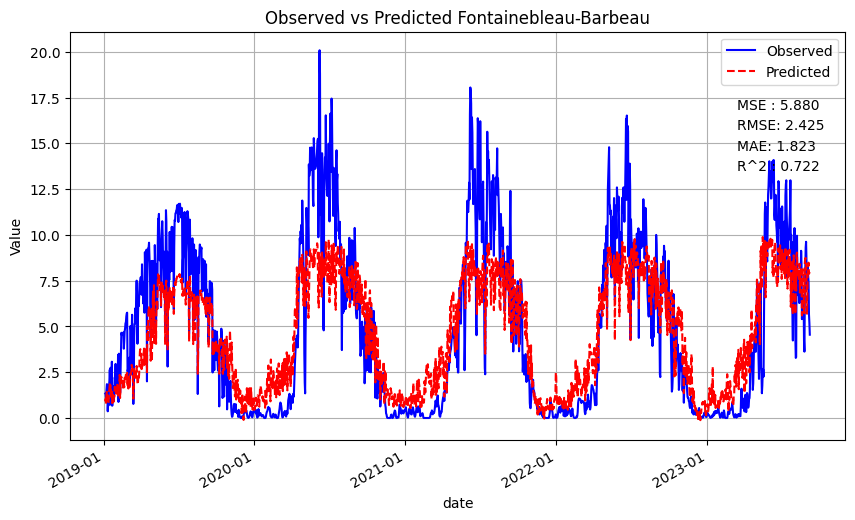

Mean Squared Error: 6.099521080360425
Root Mean Squared Error: 2.469720850695565
MAE: 1.7876242181708772
Test R^2 Score: 0.593071185017321


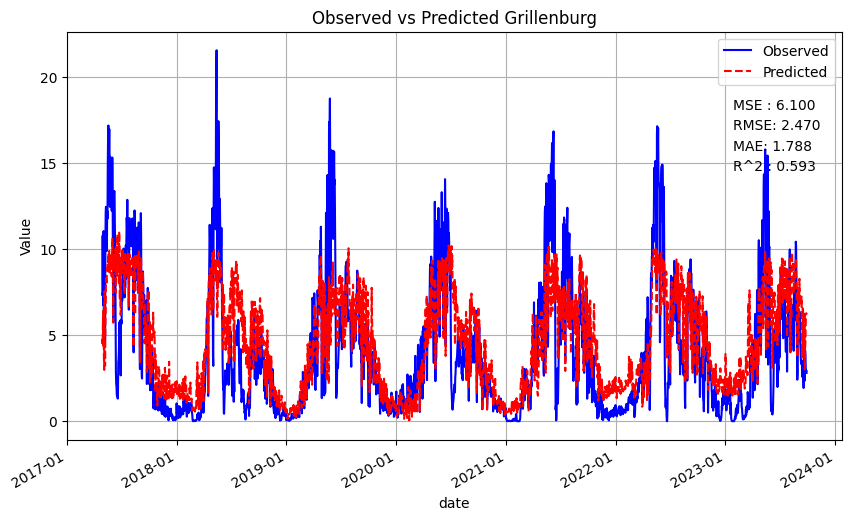

Mean Squared Error: 1.8342194955551478
Root Mean Squared Error: 1.3543335983261835
MAE: 0.8614157717399479
Test R^2 Score: 0.8453330555669344


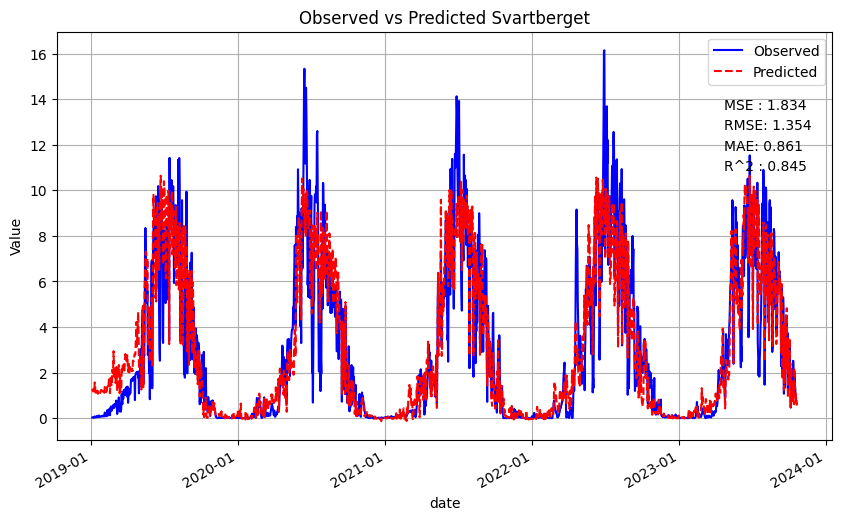

average MSE 4.604433209014539
average RMSE 2.0829448852628496
average MAE 1.4906828176809854
average R2 0.7200475213182508


In [9]:
# Columns used for features
column = col_general

# Parameters needed for XGBOOST
# Number of lag features
L = 5  
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]


params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}_L_{L}"
print(params)
model, features = retrain_XGBOOST_3(files,column, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all_3(model,params,L,column)

retrain all sites

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1_L_5
First training and testing the model on the first site
Mean Squared Error: 3.031081357130977
Root Mean Squared Error: 1.7410001025648956
MAE: 1.1408278184132254
Test R^2 Score: 0.8975981281207066


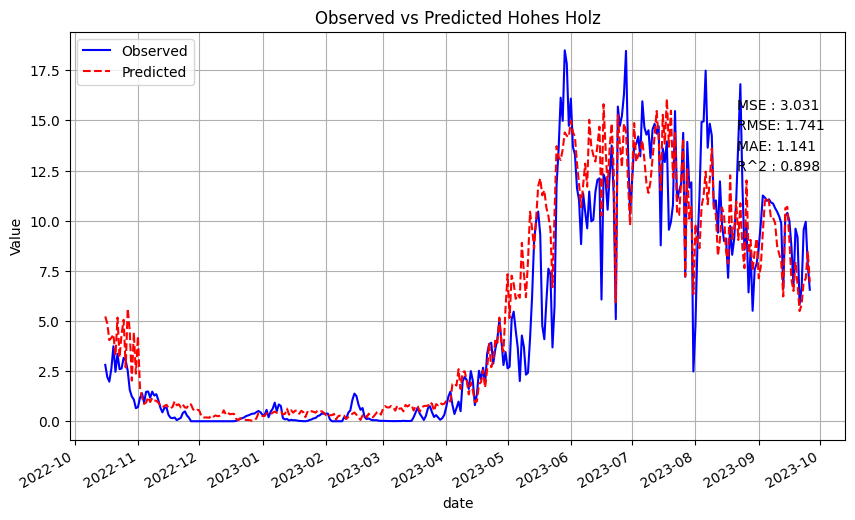

[('LE_F_MDS', 0.43509555), ('EVI2_lag_1', 0.066355385), ('EVI', 0.04445842), ('fall', 0.043572657), ('SW_IN_F', 0.038222708), ('LE_F_MDS_lag_3', 0.029863877), ('LSWI', 0.02845436), ('LE_F_MDS_lag_2', 0.025130989), ('NDII', 0.0141784735), ('EVI2', 0.011771101), ('NDII_lag_2', 0.008401199), ('LSWI_lag_3', 0.008317275), ('H_F_MDS', 0.008097194), ('summer', 0.0073425747), ('spring', 0.0073275957), ('NDII_lag_1', 0.0071020206), ('LE_F_MDS_lag_4', 0.0066276095), ('NDVI_lag_3', 0.0065844767), ('H_F_MDS_lag_3', 0.0063925064), ('VPD_F', 0.0062999483), ('LSWI_lag_1', 0.0062449044), ('EVI_lag_1', 0.005883799), ('LSWI_lag_2', 0.00578594), ('H_F_MDS_lag_4', 0.005693709), ('NDVI_lag_2', 0.005636861), ('NDVI_lag_4', 0.005488703), ('EVI2_lag_2', 0.0052697714), ('NDVI', 0.0052477606), ('EVI2_lag_3', 0.0050696954), ('MNDWI_lag_1', 0.004884129), ('CLr', 0.004739481), ('CLr_lag_2', 0.0046728626), ('NDII_lag_4', 0.0046339217), ('TA_F_lag_2', 0.0044016247), ('MNDVI', 0.004351525), ('MNDVI_lag_1', 0.00422786

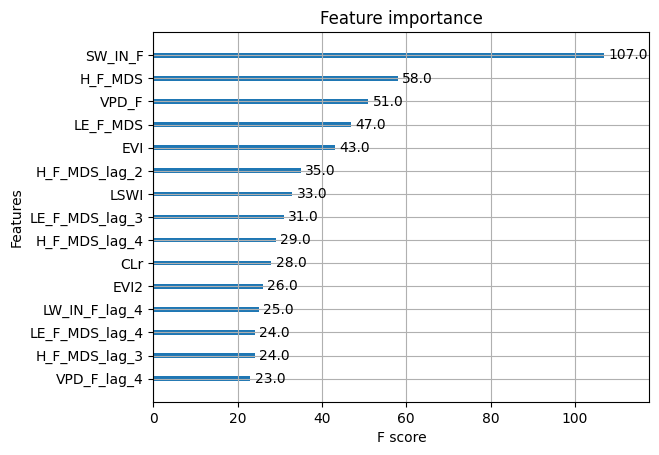

Retraining the model on the second site
Mean Squared Error: 8.200861197583228
Root Mean Squared Error: 2.8637145803280095
MAE: 1.7978431811351243
Test R^2 Score: 0.5618393056727021
[('LE_F_MDS', 0.26347405), ('MNDVI', 0.10876302), ('MNDVI_lag_1', 0.061876774), ('MNDVI_lag_2', 0.057444192), ('LE_F_MDS_lag_1', 0.031985905), ('NDII', 0.02858385), ('LE_F_MDS_lag_2', 0.028398408), ('MNDWI_lag_2', 0.023888038), ('CLr_lag_2', 0.017014332), ('EVI2', 0.016931035), ('CLr', 0.014777625), ('MNDWI', 0.013553428), ('SW_IN_F', 0.013123195), ('summer', 0.012546177), ('CLr_lag_4', 0.012368193), ('LE_F_MDS_lag_3', 0.011830952), ('EVI2_lag_4', 0.010940037), ('H_F_MDS_lag_2', 0.010053759), ('H_F_MDS_lag_4', 0.009135389), ('fall', 0.009104236), ('LW_IN_F', 0.008386224), ('LE_F_MDS_lag_4', 0.008262338), ('NDII_lag_1', 0.008201673), ('MNDVI_lag_4', 0.008200095), ('EVI2_lag_1', 0.008193452), ('H_F_MDS_lag_1', 0.008019221), ('MNDWI_lag_1', 0.0076149963), ('MNDWI_lag_4', 0.007461817), ('winter', 0.0070008705), 

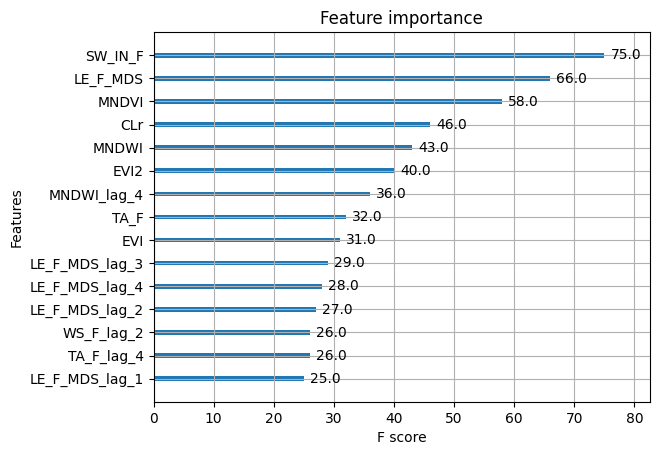

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 7.588780995611436
Root Mean Squared Error: 2.7547742186268978
MAE: 1.9901689275951988
Test R^2 Score: 0.7436210752296745


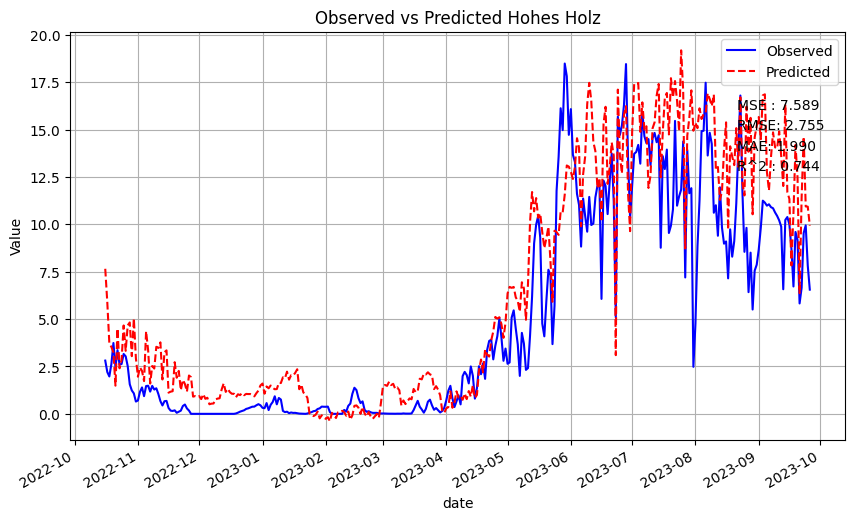

Estrees-Mons A28
Mean Squared Error: 8.200861197583228
Root Mean Squared Error: 2.8637145803280095
MAE: 1.7978431811351243
Test R^2 Score: 0.5618393056727021


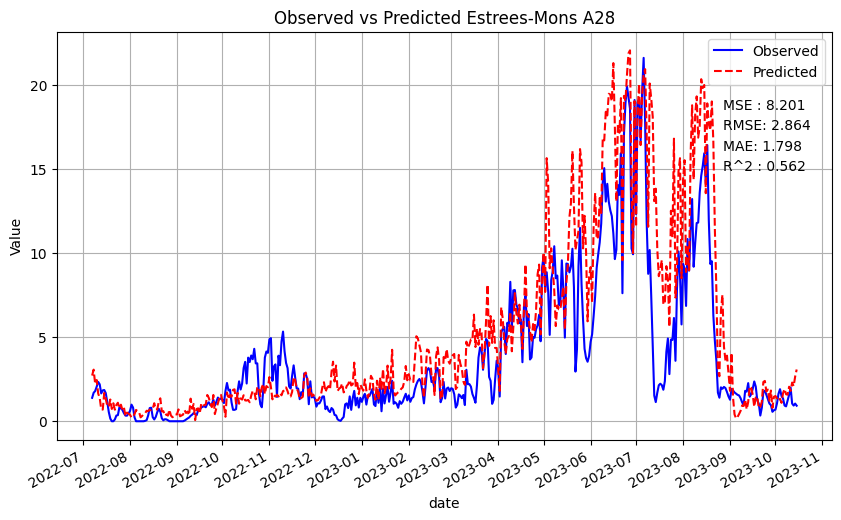

Retraining the model on the third site
Mean Squared Error: 1.0467921994619496
Root Mean Squared Error: 1.0231286329010392
MAE: 0.585763625711768
Test R^2 Score: 0.8805553752750898
[('CLr', 0.50969654), ('LE_F_MDS', 0.09113358), ('MNDVI', 0.028618203), ('MNDVI_lag_1', 0.027077379), ('LE_F_MDS_lag_4', 0.02116374), ('fall', 0.014937773), ('SW_IN_F', 0.013907312), ('EVI', 0.01188406), ('NDVI_lag_1', 0.011584234), ('NDVI_lag_4', 0.010376034), ('MNDWI_lag_2', 0.010056663), ('NDII_lag_2', 0.009485113), ('CLr_lag_4', 0.009445069), ('MNDVI_lag_4', 0.009224699), ('EVI2', 0.009162926), ('CLr_lag_1', 0.008744412), ('MNDWI_lag_1', 0.007952242), ('NDVI', 0.0071098306), ('EVI2_lag_2', 0.0064940634), ('P_F_lag_3', 0.006394811), ('H_F_MDS', 0.0063626827), ('MNDWI', 0.00612918), ('TA_F', 0.005797764), ('PA_F_lag_2', 0.005793946), ('NDII', 0.0055356803), ('LSWI_lag_3', 0.0051717726), ('LE_F_MDS_lag_1', 0.0051214993), ('SW_IN_F_lag_3', 0.0046625077), ('LSWI_lag_1', 0.0046152077), ('PA_F', 0.0045619486), (

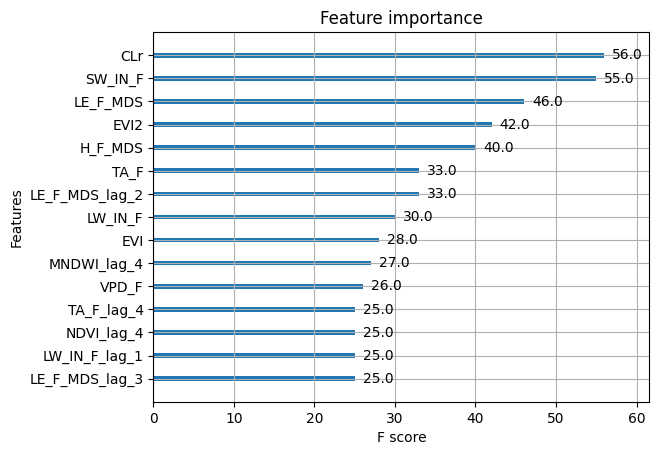

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 7.101066618182018
Root Mean Squared Error: 2.664782658713843
mae: 1.9962989778078708
Test R^2 Score: 0.7600979886829278


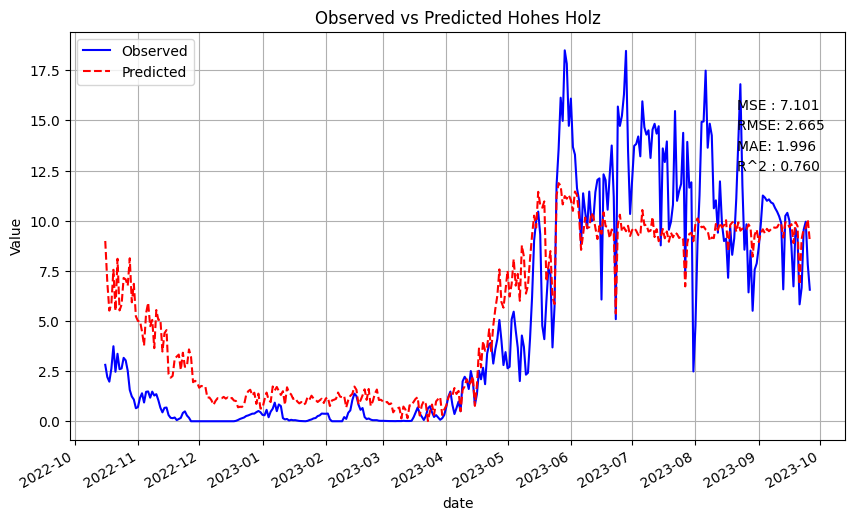

Estrees-Mons A28
Mean Squared Error: 8.110977449988054
Root Mean Squared Error: 2.8479777825657373
MAE: 2.118324669079057
Test R^2 Score: 0.5666416702422485


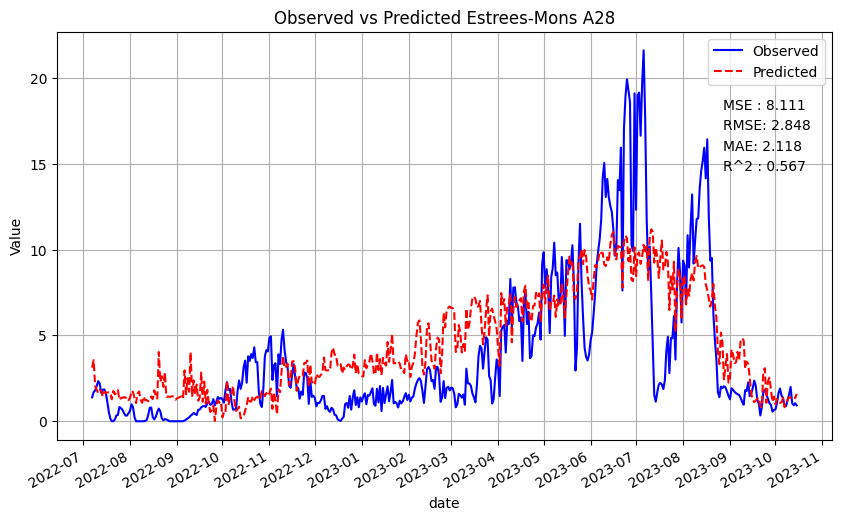

Torgnon
Mean Squared Error: 1.0467921994619496
Root Mean Squared Error: 1.0231286329010392
MAE: 0.585763625711768
Test R^2 Score: 0.8805553752750898


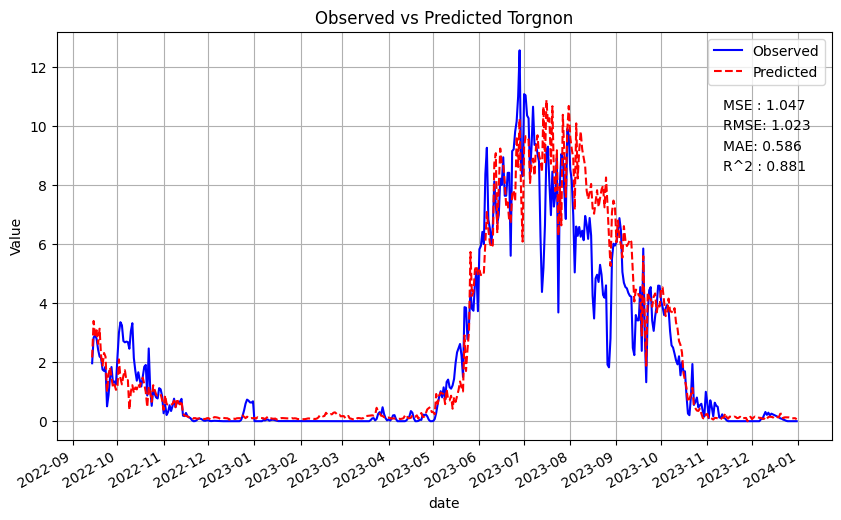

Retraining the model on the fourth site
Mean Squared Error: 1.1344391287770847
Root Mean Squared Error: 1.0651005251980137
MAE: 0.6615034832163347
Test R^2 Score: 0.8973302095102618
[('TA_F', 0.35670227), ('TA_F_lag_1', 0.17475922), ('summer', 0.08497182), ('TA_F_lag_4', 0.054991674), ('MNDVI', 0.03772882), ('SW_IN_F', 0.031178951), ('LE_F_MDS', 0.025257343), ('TA_F_lag_2', 0.024571747), ('TA_F_lag_3', 0.020874334), ('CLr_lag_4', 0.01654706), ('VPD_F', 0.012679953), ('CLr_lag_3', 0.0115252165), ('CLr_lag_2', 0.007676596), ('LSWI', 0.0058067883), ('SW_IN_F_lag_4', 0.005239786), ('LSWI_lag_4', 0.0047899634), ('NDVI_lag_1', 0.0046468694), ('MNDWI', 0.0045256815), ('CLr_lag_1', 0.004245012), ('EVI', 0.0040784967), ('CLr', 0.003546477), ('LE_F_MDS_lag_4', 0.003429091), ('EVI_lag_2', 0.0033716513), ('EVI2', 0.0032999334), ('H_F_MDS', 0.0032789789), ('LE_F_MDS_lag_2', 0.0032717113), ('LSWI_lag_3', 0.0032119076), ('NDVI_lag_2', 0.0031987089), ('LW_IN_F_lag_2', 0.0031312727), ('fall', 0.0031223

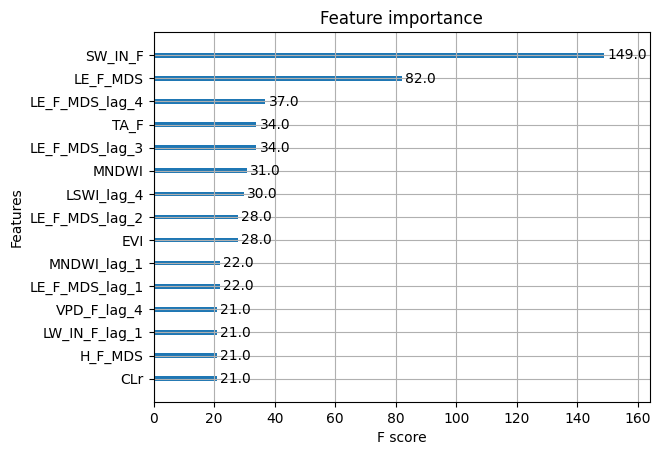

Hohes Holz
Retesting the model on the first, second, and third site
Mean Squared Error: 7.618491357356511
Root Mean Squared Error: 2.7601614730585076
MAE: 1.9845113892349644
Test R^2 Score: 0.7426173421395846


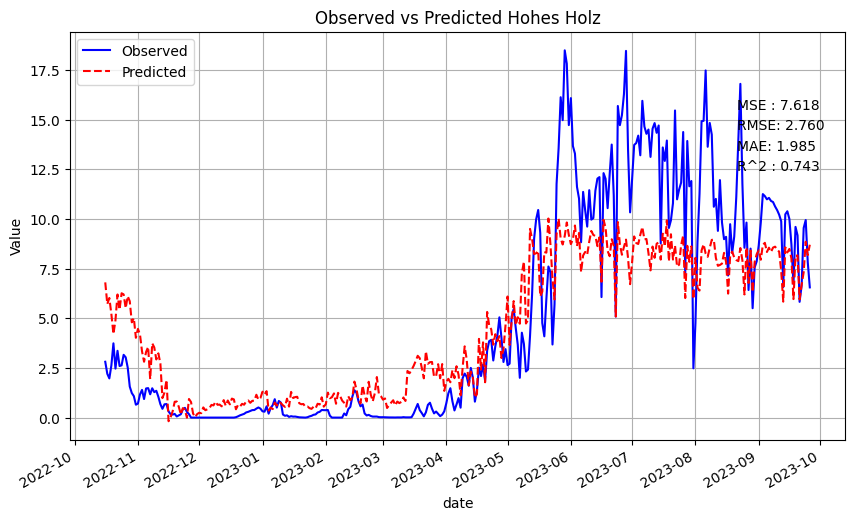

Estrees-Mons A28
Mean Squared Error: 10.538477092092725
Root Mean Squared Error: 3.2463020642097873
MAE: 2.519467547257512
Test R^2 Score: 0.4369437149863663


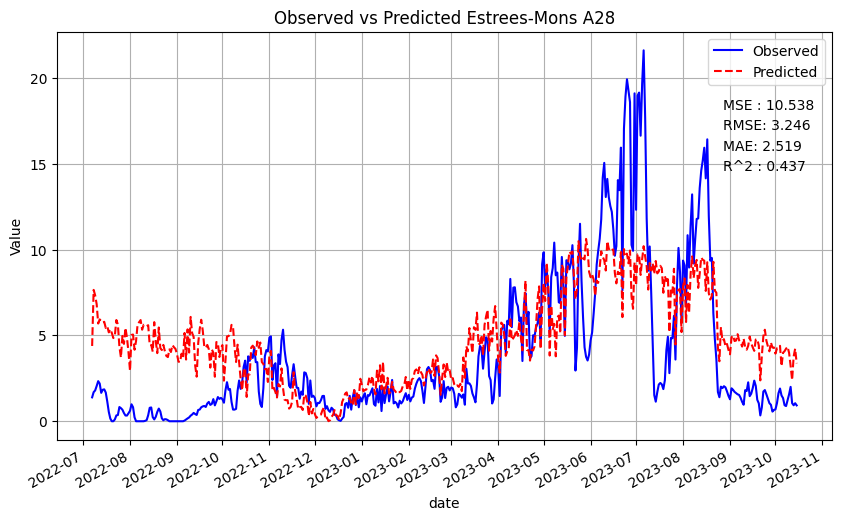

Torgnon
Mean Squared Error: 1.968742905699051
Root Mean Squared Error: 1.4031189919957079
MAE: 1.093498898046552
Test R^2 Score: 0.7753558369350455


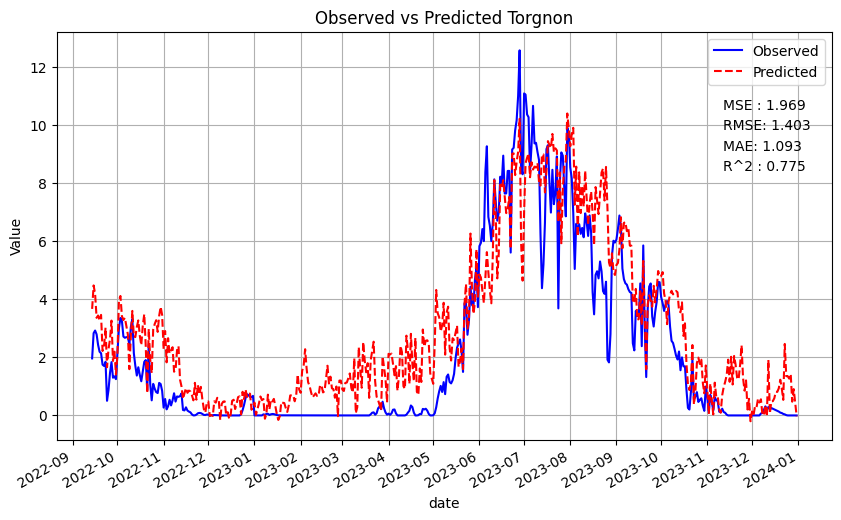

Hyytiala
Mean Squared Error: 1.1344391287770847
Root Mean Squared Error: 1.0651005251980137
MAE: 0.6615034832163347
Test R^2 Score: 0.8973302095102618


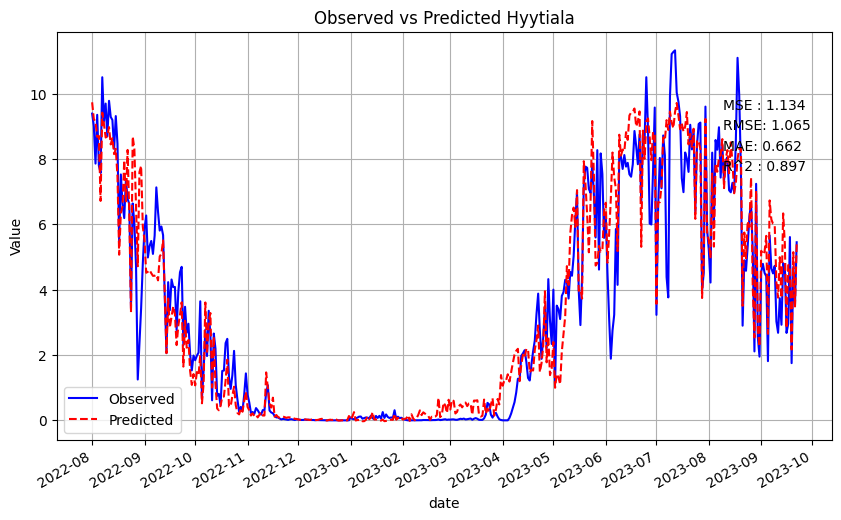

average MSE 5.315037620981343
average RMSE 2.118670763615504
average MAE 1.5647453294388407
average R2 0.7130617758928146
Mean Squared Error: 5.8795590511280444
Root Mean Squared Error: 2.4247802067668
MAE: 1.8230084631321313
Test R^2 Score: 0.7217383233704968


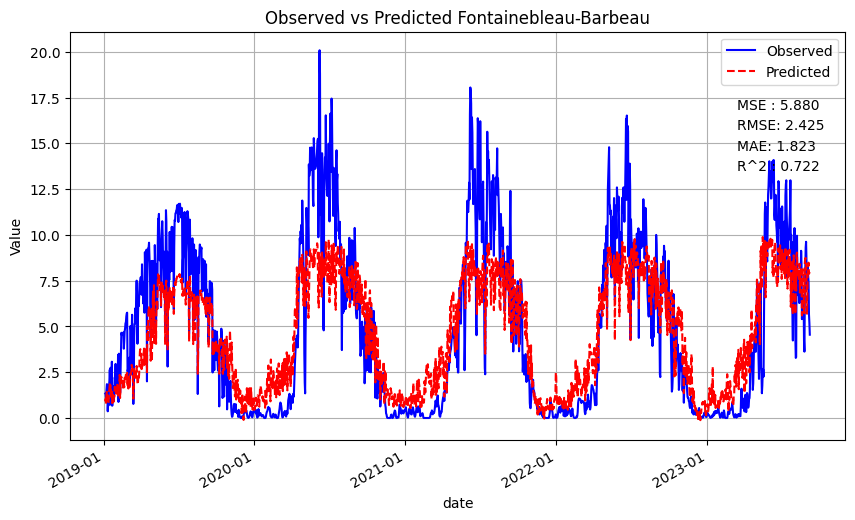

Mean Squared Error: 6.099521080360425
Root Mean Squared Error: 2.469720850695565
MAE: 1.7876242181708772
Test R^2 Score: 0.593071185017321


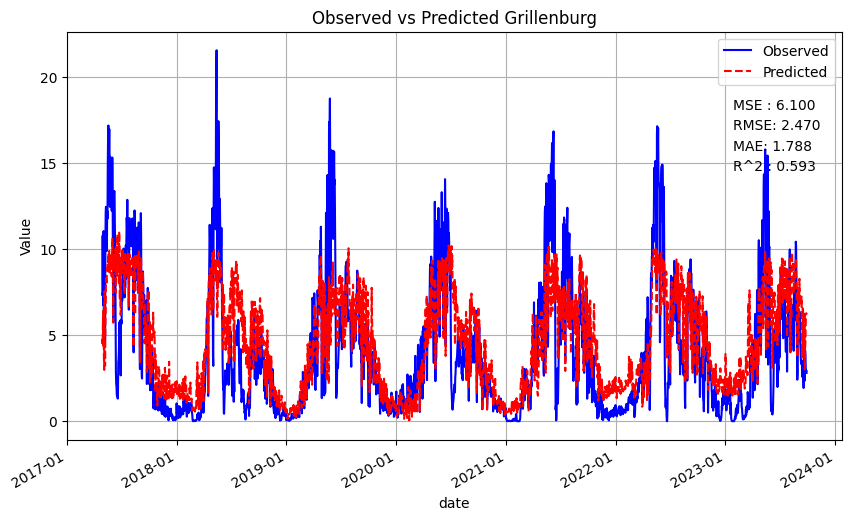

Mean Squared Error: 9.193378614600029
Root Mean Squared Error: 3.032058478097022
MAE: 2.2071979826373203
Test R^2 Score: 0.48762991139442047


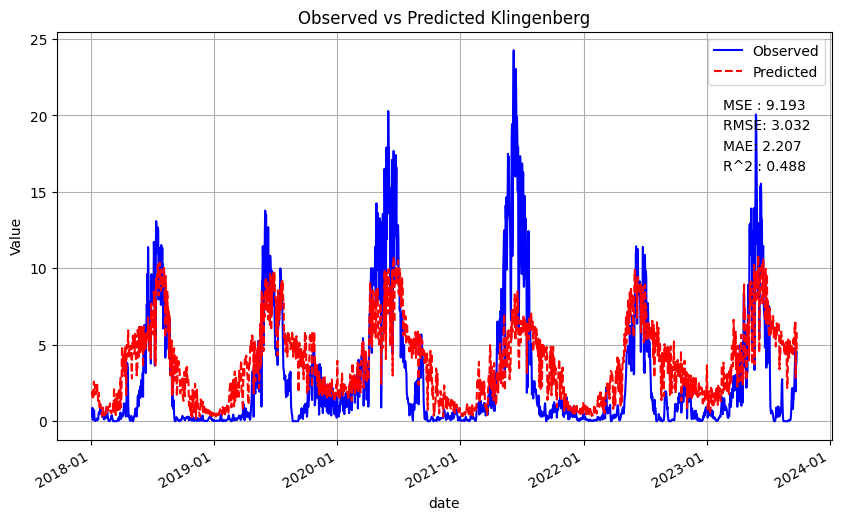

Mean Squared Error: 1.8342194955551478
Root Mean Squared Error: 1.3543335983261835
MAE: 0.8614157717399479
Test R^2 Score: 0.8453330555669344


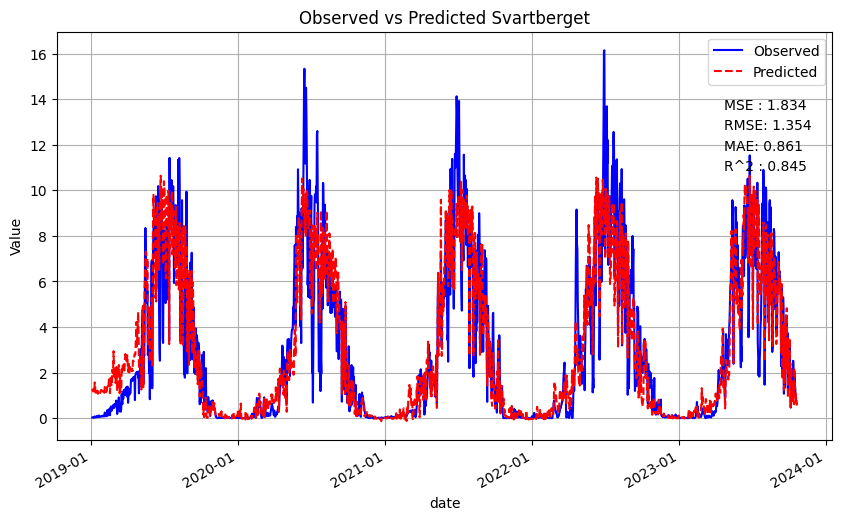

average MSE 5.751669560410911
average RMSE 2.3202232834713925
average MAE 1.6698116089200692
average R2 0.6619431188372932


In [10]:
# Columns used for features
column = col_general

# Parameters needed for XGBOOST
# Number of lag features
L = 5  
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Estrees-Mons A28_preprocessed_26052017_15102023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}_L_{L}"
print(params)
model, features = retrain_XGBOOST(files,column, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all(model,params,L,column)

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1_L_5
First training and testing the model on the first site
Mean Squared Error: 3.2309317928464387
Root Mean Squared Error: 1.7974792885723159
MAE: 1.1698976412529667
Test R^2 Score: 0.8908463929140585


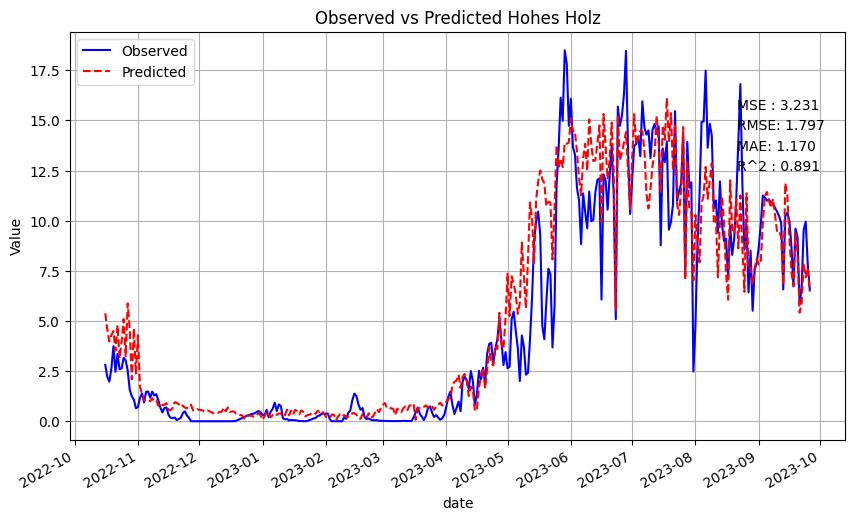

[('LE_F_MDS', 0.45457795), ('EVI2_lag_1', 0.065680616), ('LE_F_MDS_lag_3', 0.053314924), ('EVI', 0.045494057), ('SW_IN_F', 0.03996278), ('LSWI', 0.03299866), ('LE_F_MDS_lag_2', 0.022927372), ('EVI_lag_4', 0.017259302), ('LSWI_lag_3', 0.014410694), ('EVI2', 0.011987579), ('H_F_MDS_lag_4', 0.008435284), ('H_F_MDS', 0.008415094), ('NDII_lag_1', 0.008176291), ('MNDWI_lag_2', 0.007892476), ('H_F_MDS_lag_3', 0.007691132), ('NDII_lag_4', 0.0075869844), ('NDVI_lag_3', 0.007415443), ('NDII', 0.0073430627), ('LE_F_MDS_lag_4', 0.00718385), ('MNDWI_lag_1', 0.0071418034), ('NDVI_lag_4', 0.006879423), ('VPD_F', 0.0060212743), ('NDVI_lag_1', 0.005382438), ('LSWI_lag_1', 0.0051316223), ('EVI_lag_3', 0.0050652646), ('MNDVI', 0.0050021107), ('TA_F_lag_3', 0.0044356813), ('MNDVI_lag_2', 0.0042595053), ('EVI2_lag_3', 0.0041802763), ('CLr_lag_3', 0.004137076), ('MNDVI_lag_1', 0.0038376315), ('VPD_F_lag_1', 0.003605907), ('MNDVI_lag_4', 0.0035686286), ('H_F_MDS_lag_2', 0.0035593002), ('LW_IN_F', 0.003524408

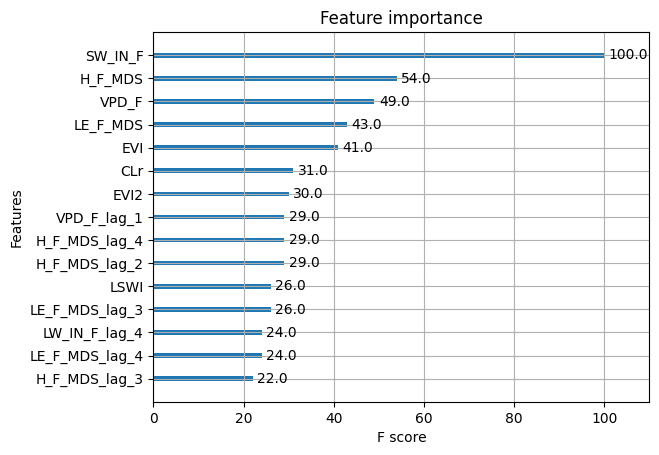

Retraining the model on the second site
Mean Squared Error: 9.642435873162164
Root Mean Squared Error: 3.1052271854346123
MAE: 1.9593982943907404
Test R^2 Score: 0.4848179605287971
[('LE_F_MDS', 0.30837235), ('MNDVI', 0.1285871), ('MNDVI_lag_2', 0.026809068), ('LE_F_MDS_lag_2', 0.025664987), ('LE_F_MDS_lag_1', 0.025533214), ('MNDVI_lag_1', 0.024662469), ('MNDWI_lag_2', 0.024579242), ('LE_F_MDS_lag_3', 0.01966997), ('MNDWI', 0.015823487), ('EVI2', 0.013936798), ('EVI2_lag_4', 0.013723886), ('CLr_lag_2', 0.013663443), ('NDII_lag_1', 0.013500438), ('SW_IN_F', 0.013464811), ('CLr', 0.012967375), ('H_F_MDS_lag_2', 0.01279354), ('SW_IN_F_lag_2', 0.01272974), ('NDII', 0.0126902545), ('CLr_lag_4', 0.011405543), ('TA_F_lag_2', 0.011063257), ('TA_F_lag_3', 0.009907789), ('H_F_MDS_lag_3', 0.009108452), ('LE_F_MDS_lag_4', 0.008946519), ('LSWI_lag_2', 0.008938457), ('MNDWI_lag_4', 0.008272043), ('CLr_lag_3', 0.008150633), ('NDVI_lag_3', 0.0079636), ('H_F_MDS_lag_4', 0.007940694), ('CLr_lag_1', 0.00

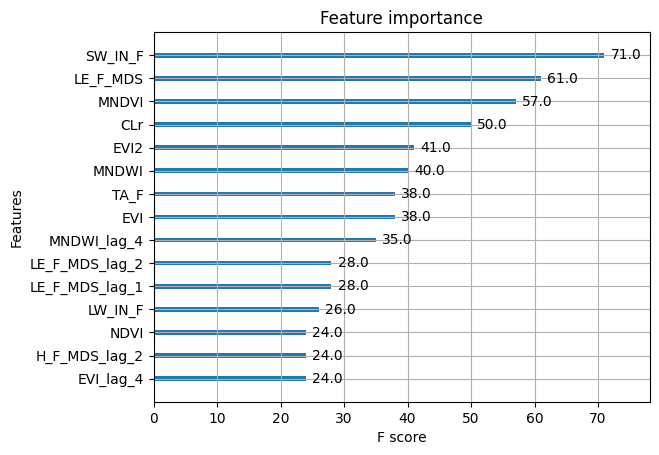

Retesting the model on the first site
Hohes Holz
Mean Squared Error: 6.778769022325301
Root Mean Squared Error: 2.6036069254642302
MAE: 1.9021045773770613
Test R^2 Score: 0.7709864714484194


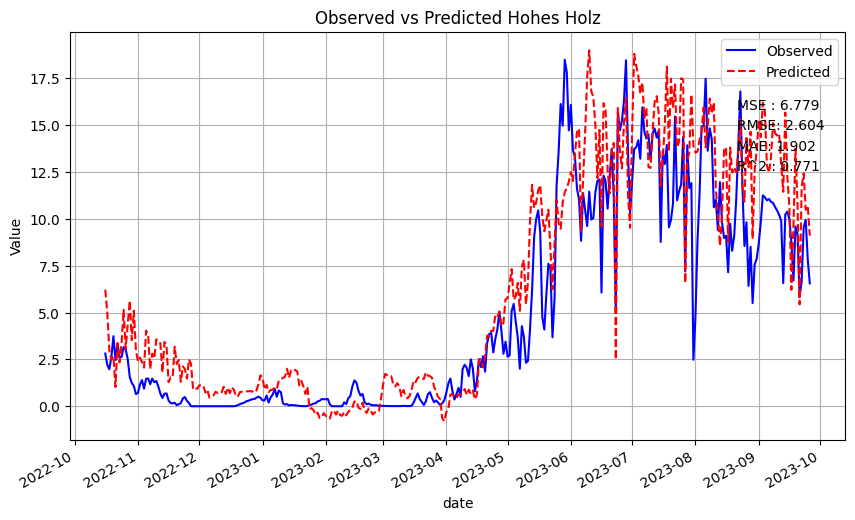

Estrees-Mons A28
Mean Squared Error: 9.642435873162164
Root Mean Squared Error: 3.1052271854346123
MAE: 1.9593982943907404
Test R^2 Score: 0.4848179605287971


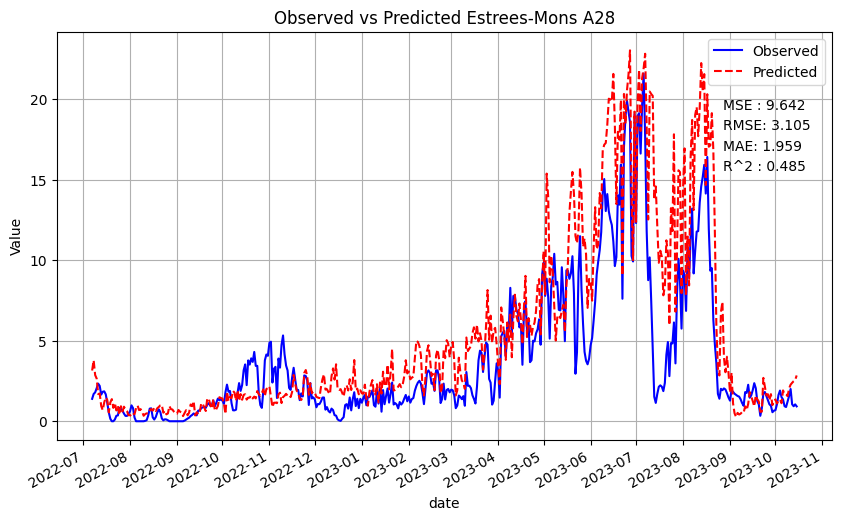

Retraining the model on the third site
Mean Squared Error: 1.0354483802963281
Root Mean Squared Error: 1.0175698405005567
MAE: 0.5861241015185262
Test R^2 Score: 0.8818497661044075
[('CLr', 0.5308976), ('LE_F_MDS', 0.09950639), ('LE_F_MDS_lag_4', 0.025698015), ('MNDVI', 0.01915283), ('SW_IN_F', 0.014785028), ('MNDWI_lag_1', 0.014454928), ('NDVI_lag_4', 0.011595109), ('EVI', 0.010179486), ('CLr_lag_4', 0.0101044895), ('CLr_lag_1', 0.008864086), ('NDVI', 0.0084031625), ('MNDWI_lag_3', 0.008347098), ('NDII_lag_2', 0.00810241), ('EVI2', 0.007951391), ('MNDWI_lag_2', 0.0077875713), ('P_F_lag_4', 0.007503397), ('MNDVI_lag_1', 0.0068631927), ('NDII', 0.0067538903), ('TA_F', 0.0066642133), ('MNDWI', 0.0065339585), ('EVI2_lag_2', 0.006232212), ('LSWI_lag_1', 0.0061676414), ('H_F_MDS', 0.0055597182), ('LSWI', 0.0053302874), ('EVI_lag_1', 0.0052597714), ('LSWI_lag_3', 0.005246479), ('PA_F', 0.005167632), ('NDVI_lag_1', 0.0047519878), ('MNDVI_lag_4', 0.0045834663), ('SW_IN_F_lag_3', 0.0044187675),

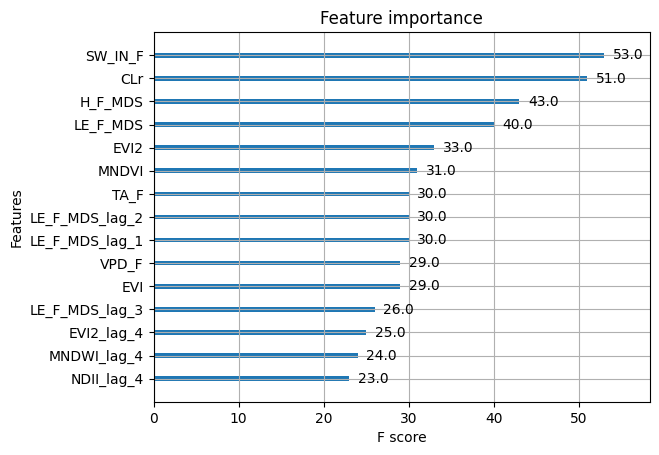

Hohes Holz
Retesting the model on the first and second site
Mean Squared Error: 7.044350813723081
Root Mean Squared Error: 2.6541195929579136
mae: 1.9566714539039933
Test R^2 Score: 0.7620140720398035


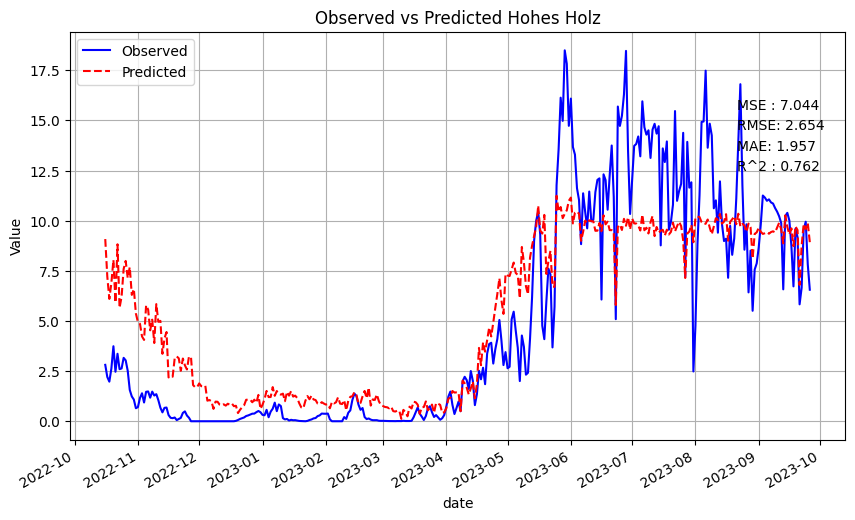

Estrees-Mons A28
Mean Squared Error: 7.6692101714802465
Root Mean Squared Error: 2.769333885879463
MAE: 1.9817319979385093
Test R^2 Score: 0.5902446861717345


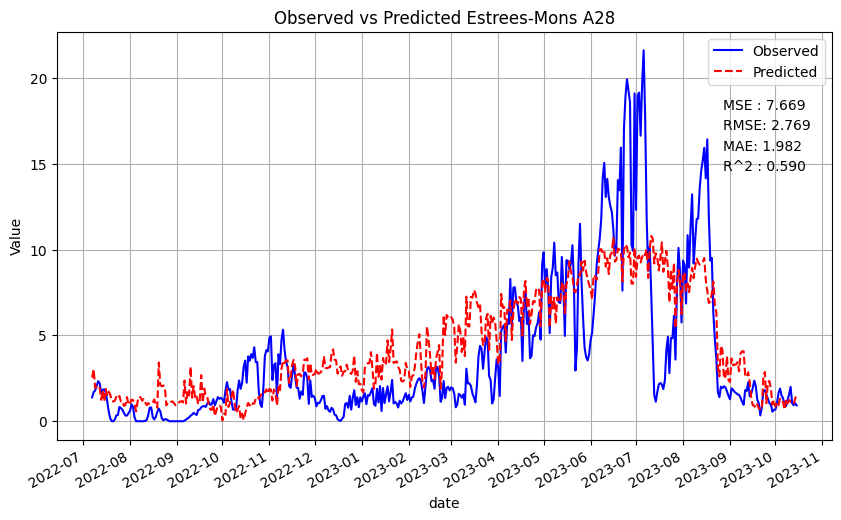

Torgnon
Mean Squared Error: 1.0354483802963281
Root Mean Squared Error: 1.0175698405005567
MAE: 0.5861241015185262
Test R^2 Score: 0.8818497661044075


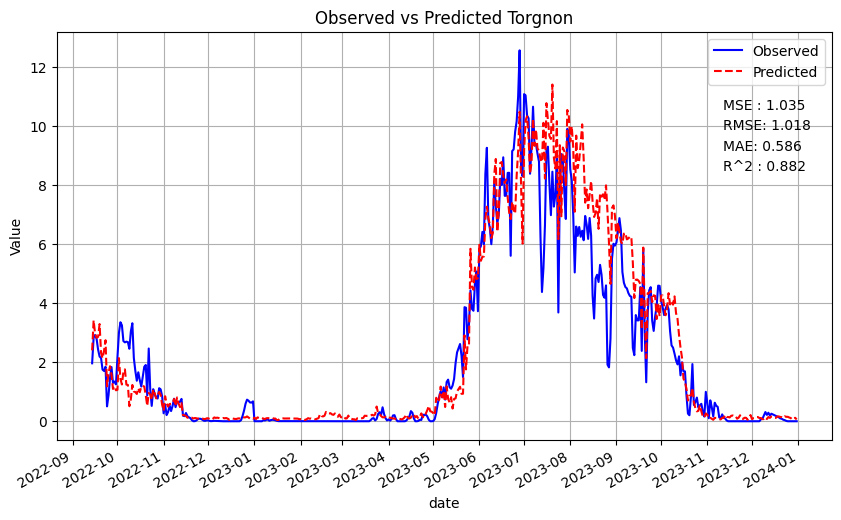

Retraining the model on the fourth site
Mean Squared Error: 1.1461970795913314
Root Mean Squared Error: 1.0706059403867192
MAE: 0.6638828060183026
Test R^2 Score: 0.8962660833565838
[('TA_F', 0.3477239), ('TA_F_lag_1', 0.1912164), ('TA_F_lag_4', 0.093197234), ('MNDVI', 0.052127928), ('TA_F_lag_2', 0.03458341), ('SW_IN_F', 0.034437444), ('LE_F_MDS', 0.028226603), ('CLr_lag_4', 0.018548196), ('CLr_lag_3', 0.014316784), ('MNDVI_lag_4', 0.012052559), ('VPD_F', 0.009530329), ('NDVI_lag_1', 0.008082906), ('CLr_lag_2', 0.0070931544), ('LSWI', 0.00579112), ('LW_IN_F_lag_2', 0.005445865), ('CLr_lag_1', 0.005214915), ('LSWI_lag_4', 0.004781042), ('SW_IN_F_lag_4', 0.0047189915), ('CLr', 0.0043988647), ('EVI2_lag_4', 0.003970076), ('MNDWI', 0.003838156), ('EVI', 0.00373046), ('LE_F_MDS_lag_4', 0.0036983707), ('LE_F_MDS_lag_2', 0.0036768764), ('NDVI_lag_2', 0.003586574), ('EVI2_lag_1', 0.0034675484), ('LSWI_lag_1', 0.003284447), ('NDII', 0.003230971), ('LSWI_lag_3', 0.003085542), ('H_F_MDS', 0.0030

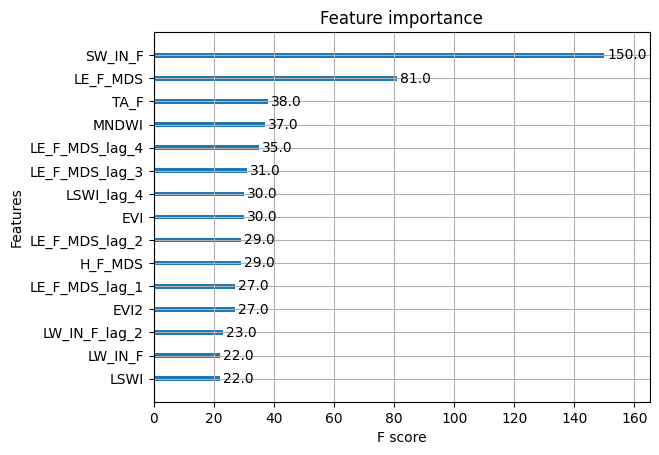

Hohes Holz
Retesting the model on the first, second, and third site
Mean Squared Error: 6.392875522505844
Root Mean Squared Error: 2.528413637541501
MAE: 1.7972201343336667
Test R^2 Score: 0.7840234744422842


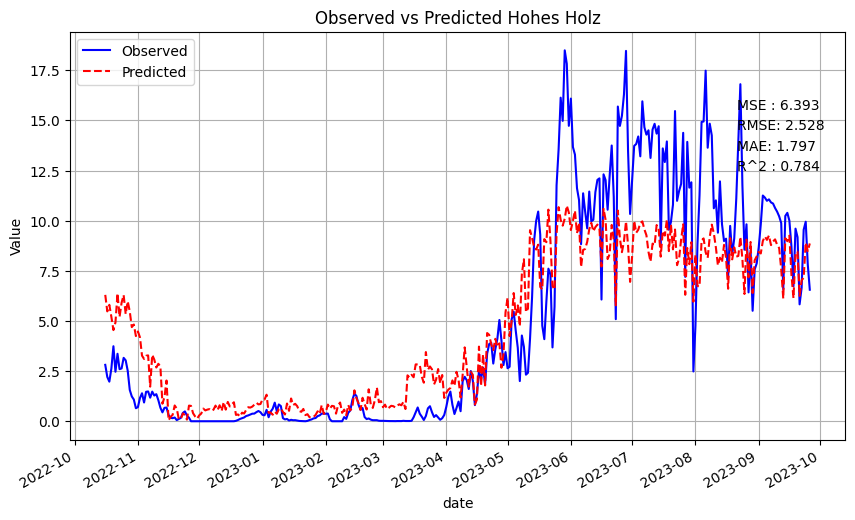

Estrees-Mons A28
Mean Squared Error: 10.316906012265028
Root Mean Squared Error: 3.211994086586248
MAE: 2.515258459566576
Test R^2 Score: 0.4487819519521088


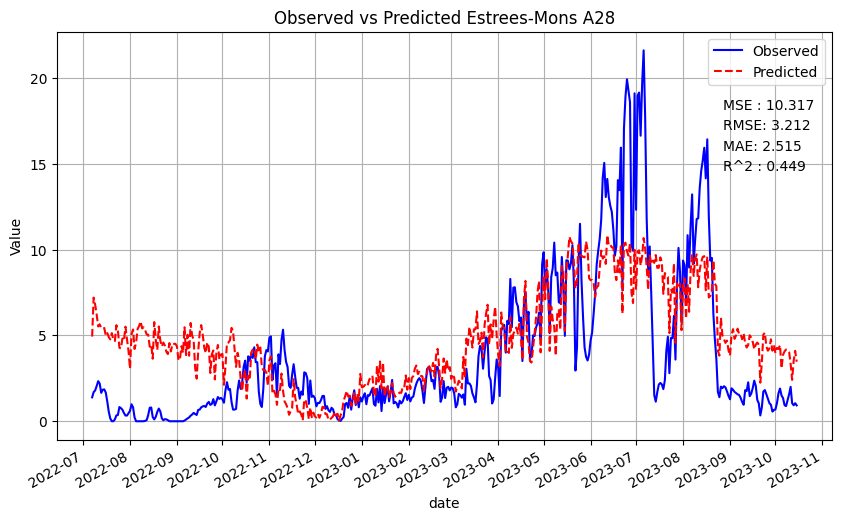

Torgnon
Mean Squared Error: 1.9876067368234545
Root Mean Squared Error: 1.4098250731290938
MAE: 1.077782998667483
Test R^2 Score: 0.7732033722618405


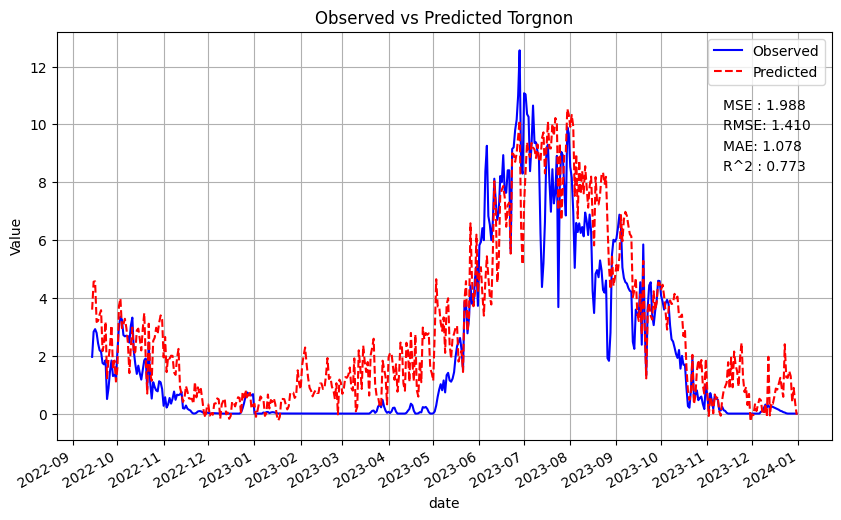

Hyytiala
Mean Squared Error: 1.1461970795913314
Root Mean Squared Error: 1.0706059403867192
MAE: 0.6638828060183026
Test R^2 Score: 0.8962660833565838


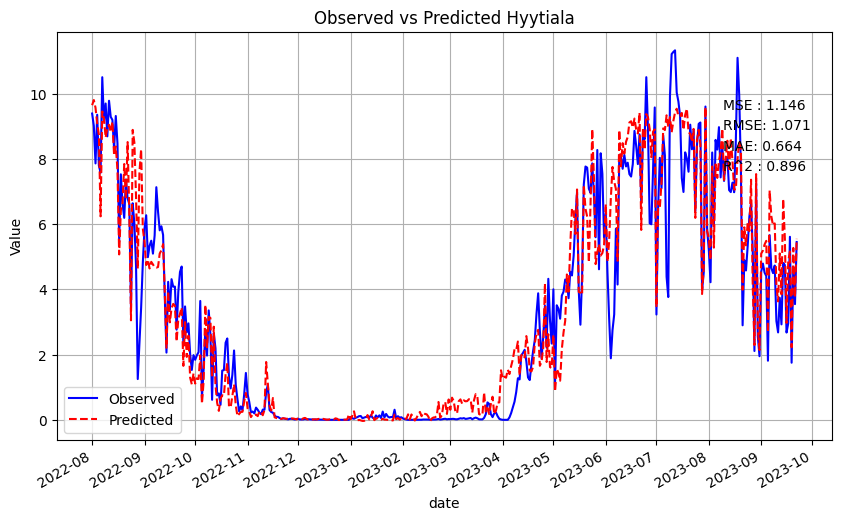

average MSE 4.960896337796415
average RMSE 2.0552096844108907
average MAE 1.513536099646507
average R2 0.7255687205032043
Mean Squared Error: 5.2195083189560005
Root Mean Squared Error: 2.2846243277519394
MAE: 1.7052134868950815
Test R^2 Score: 0.7529765202824721


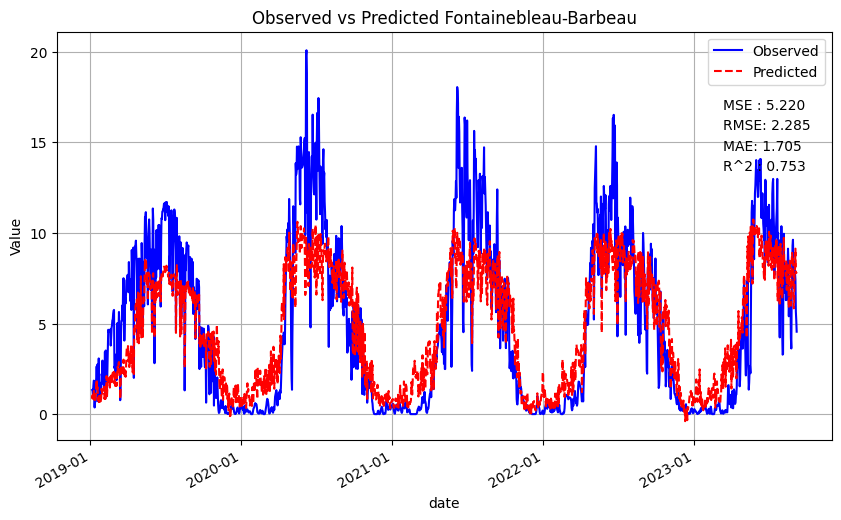

Mean Squared Error: 5.737907885112456
Root Mean Squared Error: 2.3953930544093294
MAE: 1.693880853430192
Test R^2 Score: 0.6171961658290377


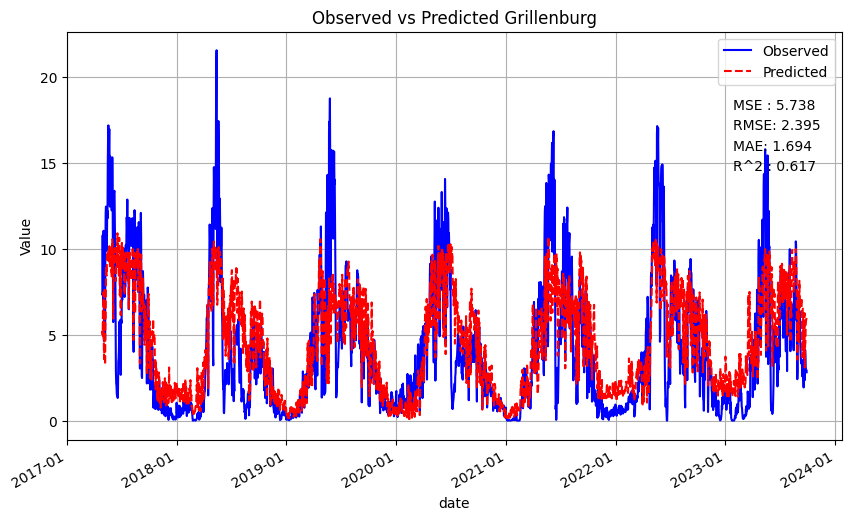

Mean Squared Error: 8.980963341236599
Root Mean Squared Error: 2.996825544010962
MAE: 2.134626296332218
Test R^2 Score: 0.4994683482734975


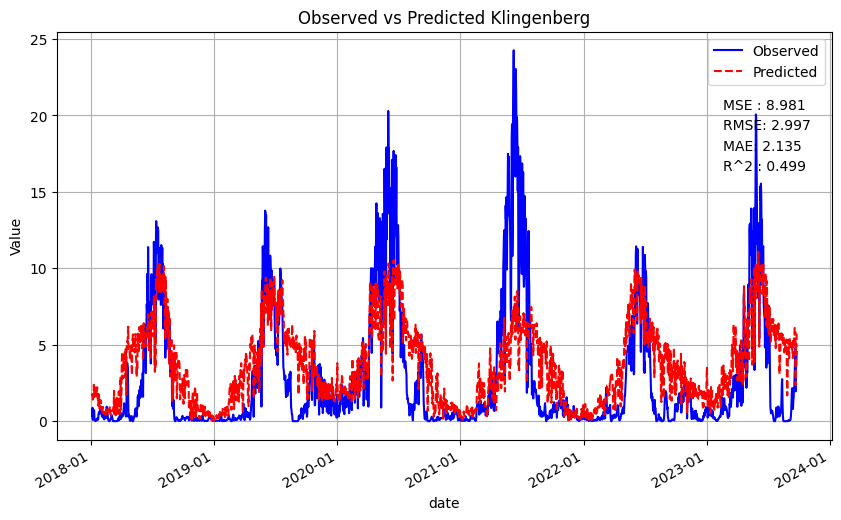

Mean Squared Error: 1.8724242897449048
Root Mean Squared Error: 1.368365554135628
MAE: 0.8839389400033311
Test R^2 Score: 0.842111511583598


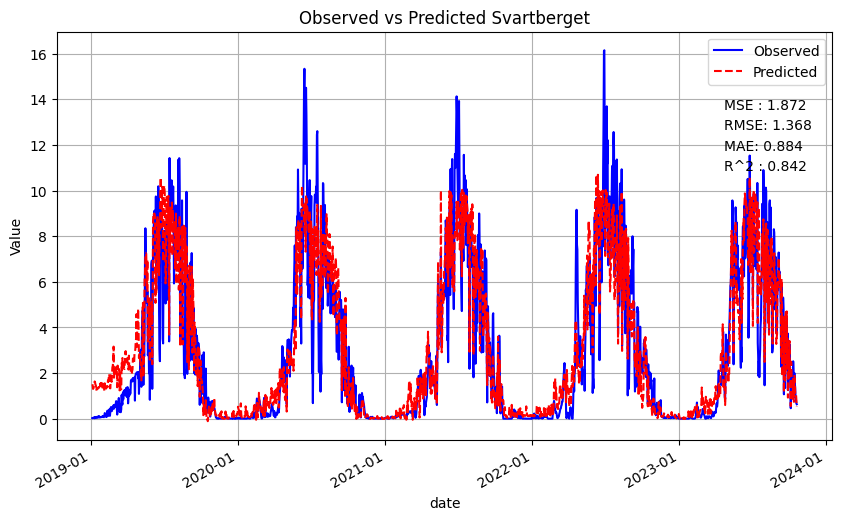

average MSE 5.45270095876249
average RMSE 2.261302120076965
average MAE 1.6044148941652057
average R2 0.6779381364921513


In [11]:

# Columns used for features
column = col2

# Parameters needed for XGBOOST
# Number of lag features
L = 5  
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Estrees-Mons A28_preprocessed_26052017_15102023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]
params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}_L_{L}"
print(params)
model, features = retrain_XGBOOST(files,column, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all(model,params,L,column)

training sites alphabetical order

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1_L_5
First training and testing the model on the first site
Mean Squared Error: 9.642435873162164
Root Mean Squared Error: 3.1052271854346123
MAE: 1.9593982943907404
Test R^2 Score: 0.4848179605287971


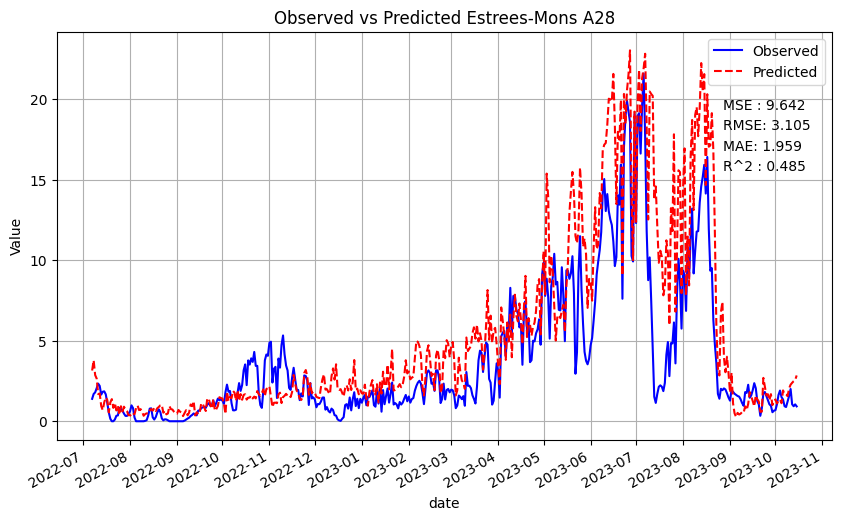

[('LE_F_MDS', 0.30837235), ('MNDVI', 0.1285871), ('MNDVI_lag_2', 0.026809068), ('LE_F_MDS_lag_2', 0.025664987), ('LE_F_MDS_lag_1', 0.025533214), ('MNDVI_lag_1', 0.024662469), ('MNDWI_lag_2', 0.024579242), ('LE_F_MDS_lag_3', 0.01966997), ('MNDWI', 0.015823487), ('EVI2', 0.013936798), ('EVI2_lag_4', 0.013723886), ('CLr_lag_2', 0.013663443), ('NDII_lag_1', 0.013500438), ('SW_IN_F', 0.013464811), ('CLr', 0.012967375), ('H_F_MDS_lag_2', 0.01279354), ('SW_IN_F_lag_2', 0.01272974), ('NDII', 0.0126902545), ('CLr_lag_4', 0.011405543), ('TA_F_lag_2', 0.011063257), ('TA_F_lag_3', 0.009907789), ('H_F_MDS_lag_3', 0.009108452), ('LE_F_MDS_lag_4', 0.008946519), ('LSWI_lag_2', 0.008938457), ('MNDWI_lag_4', 0.008272043), ('CLr_lag_3', 0.008150633), ('NDVI_lag_3', 0.0079636), ('H_F_MDS_lag_4', 0.007940694), ('CLr_lag_1', 0.006987298), ('LW_IN_F', 0.0065393858), ('LW_IN_F_lag_3', 0.0061915186), ('EVI2_lag_1', 0.006149974), ('NDII_lag_2', 0.00602621), ('NDVI', 0.0055614747), ('MNDWI_lag_3', 0.0054917517),

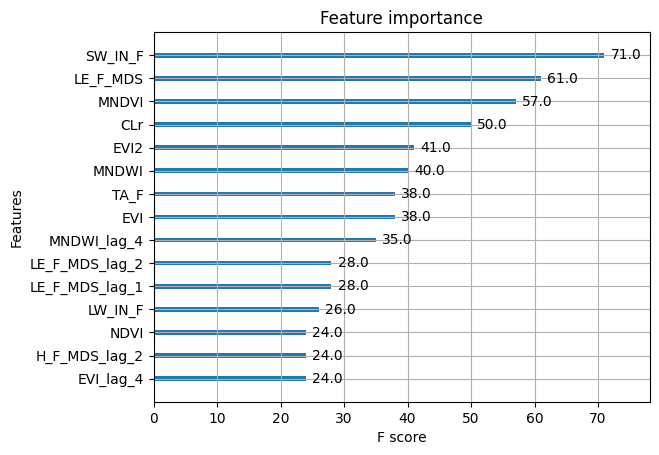

Retraining the model on the second site
Mean Squared Error: 3.2309317928464387
Root Mean Squared Error: 1.7974792885723159
MAE: 1.1698976412529667
Test R^2 Score: 0.8908463929140585
[('LE_F_MDS', 0.45457795), ('EVI2_lag_1', 0.065680616), ('LE_F_MDS_lag_3', 0.053314924), ('EVI', 0.045494057), ('SW_IN_F', 0.03996278), ('LSWI', 0.03299866), ('LE_F_MDS_lag_2', 0.022927372), ('EVI_lag_4', 0.017259302), ('LSWI_lag_3', 0.014410694), ('EVI2', 0.011987579), ('H_F_MDS_lag_4', 0.008435284), ('H_F_MDS', 0.008415094), ('NDII_lag_1', 0.008176291), ('MNDWI_lag_2', 0.007892476), ('H_F_MDS_lag_3', 0.007691132), ('NDII_lag_4', 0.0075869844), ('NDVI_lag_3', 0.007415443), ('NDII', 0.0073430627), ('LE_F_MDS_lag_4', 0.00718385), ('MNDWI_lag_1', 0.0071418034), ('NDVI_lag_4', 0.006879423), ('VPD_F', 0.0060212743), ('NDVI_lag_1', 0.005382438), ('LSWI_lag_1', 0.0051316223), ('EVI_lag_3', 0.0050652646), ('MNDVI', 0.0050021107), ('TA_F_lag_3', 0.0044356813), ('MNDVI_lag_2', 0.0042595053), ('EVI2_lag_3', 0.0041802

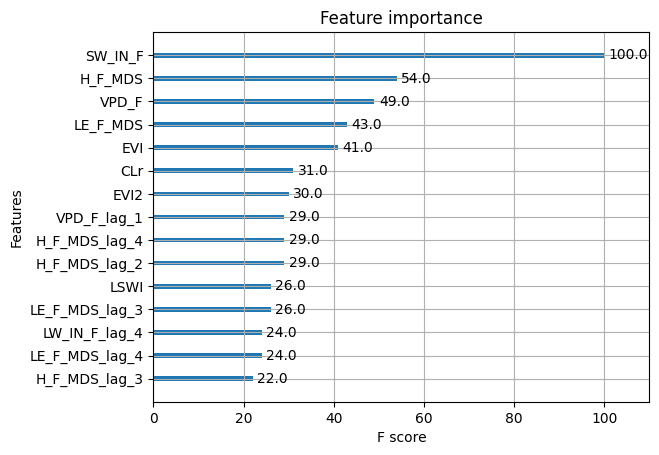

Retesting the model on the first site
Estrees-Mons A28
Mean Squared Error: 16.398530737101844
Root Mean Squared Error: 4.049509937893948
MAE: 3.0835000361674787
Test R^2 Score: 0.12384913723042446


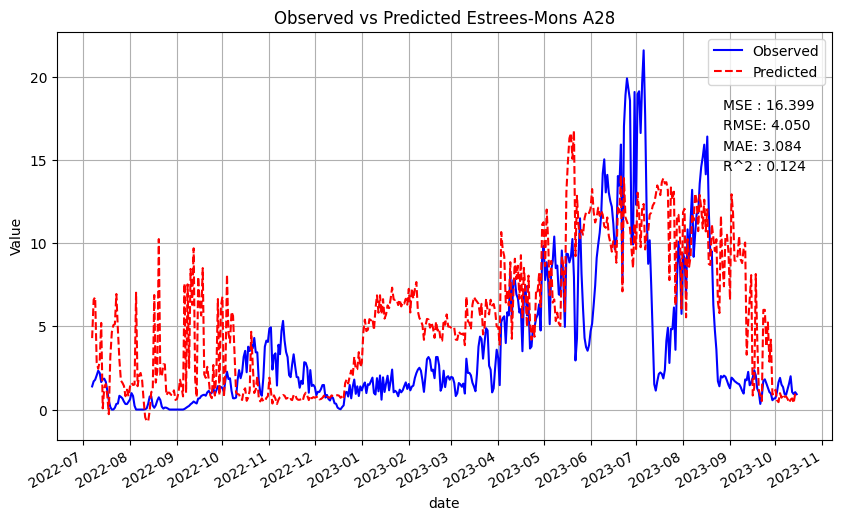

Hohes Holz
Mean Squared Error: 3.2309317928464387
Root Mean Squared Error: 1.7974792885723159
MAE: 1.1698976412529667
Test R^2 Score: 0.8908463929140585


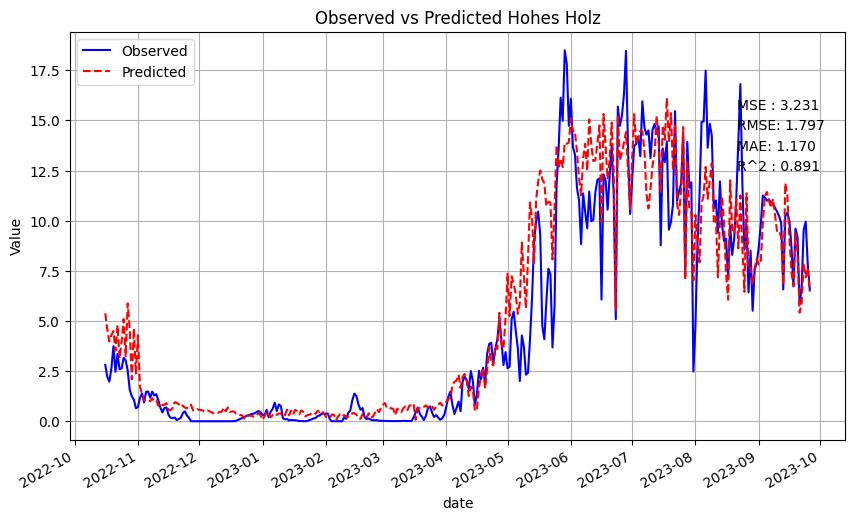

Retraining the model on the third site
Mean Squared Error: 1.1461970795913314
Root Mean Squared Error: 1.0706059403867192
MAE: 0.6638828060183026
Test R^2 Score: 0.8962660833565838
[('TA_F', 0.3477239), ('TA_F_lag_1', 0.1912164), ('TA_F_lag_4', 0.093197234), ('MNDVI', 0.052127928), ('TA_F_lag_2', 0.03458341), ('SW_IN_F', 0.034437444), ('LE_F_MDS', 0.028226603), ('CLr_lag_4', 0.018548196), ('CLr_lag_3', 0.014316784), ('MNDVI_lag_4', 0.012052559), ('VPD_F', 0.009530329), ('NDVI_lag_1', 0.008082906), ('CLr_lag_2', 0.0070931544), ('LSWI', 0.00579112), ('LW_IN_F_lag_2', 0.005445865), ('CLr_lag_1', 0.005214915), ('LSWI_lag_4', 0.004781042), ('SW_IN_F_lag_4', 0.0047189915), ('CLr', 0.0043988647), ('EVI2_lag_4', 0.003970076), ('MNDWI', 0.003838156), ('EVI', 0.00373046), ('LE_F_MDS_lag_4', 0.0036983707), ('LE_F_MDS_lag_2', 0.0036768764), ('NDVI_lag_2', 0.003586574), ('EVI2_lag_1', 0.0034675484), ('LSWI_lag_1', 0.003284447), ('NDII', 0.003230971), ('LSWI_lag_3', 0.003085542), ('H_F_MDS', 0.00305

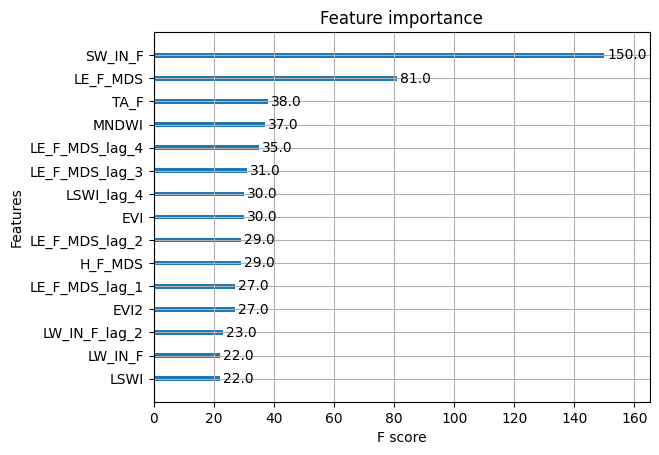

Estrees-Mons A28
Retesting the model on the first and second site
Mean Squared Error: 10.316906012265028
Root Mean Squared Error: 3.211994086586248
mae: 2.515258459566576
Test R^2 Score: 0.4487819519521088


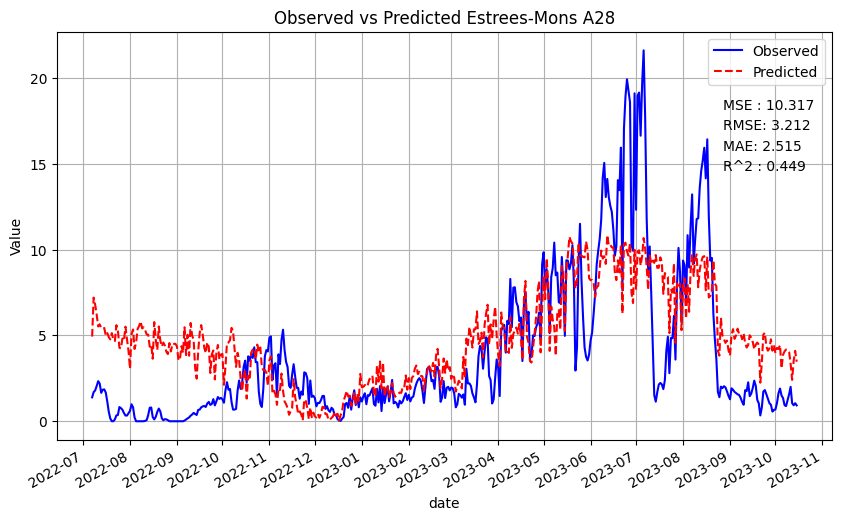

Hohes Holz
Mean Squared Error: 6.392875522505844
Root Mean Squared Error: 2.528413637541501
MAE: 1.7972201343336667
Test R^2 Score: 0.7840234744422842


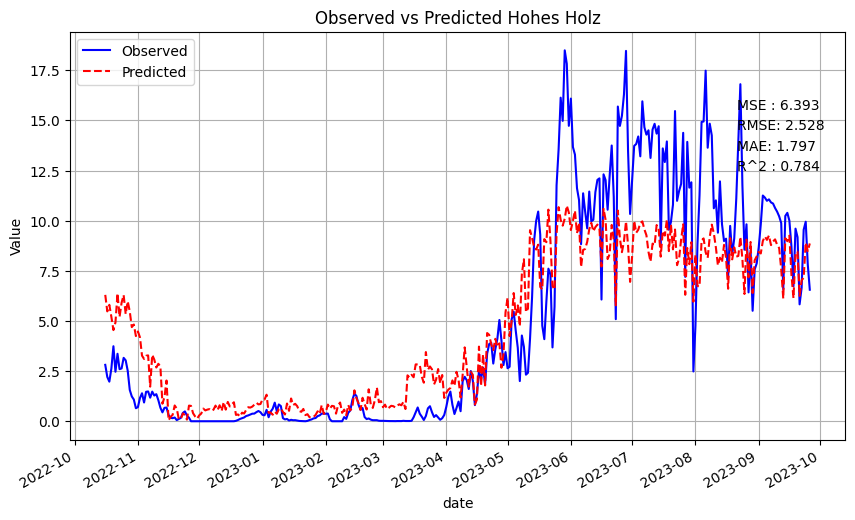

Hyytiala
Mean Squared Error: 1.1461970795913314
Root Mean Squared Error: 1.0706059403867192
MAE: 0.6638828060183026
Test R^2 Score: 0.8962660833565838


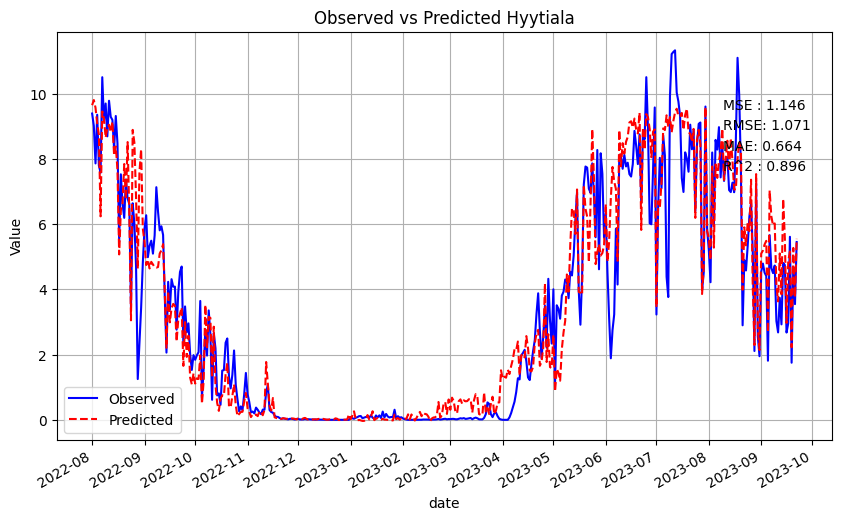

Retraining the model on the fourth site
Mean Squared Error: 1.0354483802963281
Root Mean Squared Error: 1.0175698405005567
MAE: 0.5861241015185262
Test R^2 Score: 0.8818497661044075
[('CLr', 0.5308976), ('LE_F_MDS', 0.09950639), ('LE_F_MDS_lag_4', 0.025698015), ('MNDVI', 0.01915283), ('SW_IN_F', 0.014785028), ('MNDWI_lag_1', 0.014454928), ('NDVI_lag_4', 0.011595109), ('EVI', 0.010179486), ('CLr_lag_4', 0.0101044895), ('CLr_lag_1', 0.008864086), ('NDVI', 0.0084031625), ('MNDWI_lag_3', 0.008347098), ('NDII_lag_2', 0.00810241), ('EVI2', 0.007951391), ('MNDWI_lag_2', 0.0077875713), ('P_F_lag_4', 0.007503397), ('MNDVI_lag_1', 0.0068631927), ('NDII', 0.0067538903), ('TA_F', 0.0066642133), ('MNDWI', 0.0065339585), ('EVI2_lag_2', 0.006232212), ('LSWI_lag_1', 0.0061676414), ('H_F_MDS', 0.0055597182), ('LSWI', 0.0053302874), ('EVI_lag_1', 0.0052597714), ('LSWI_lag_3', 0.005246479), ('PA_F', 0.005167632), ('NDVI_lag_1', 0.0047519878), ('MNDVI_lag_4', 0.0045834663), ('SW_IN_F_lag_3', 0.0044187675)

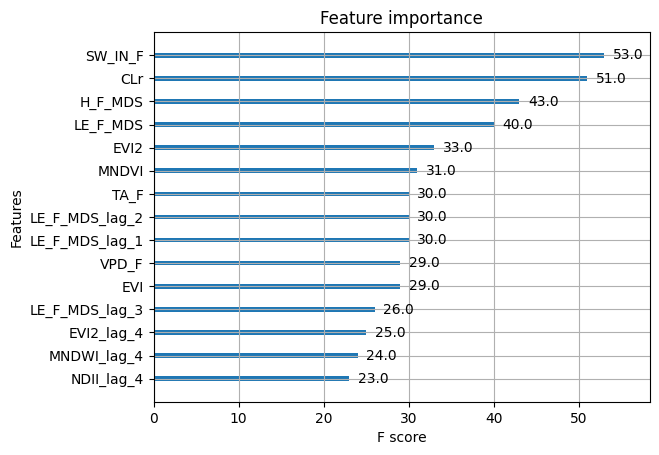

Estrees-Mons A28
Retesting the model on the first, second, and third site
Mean Squared Error: 7.6692101714802465
Root Mean Squared Error: 2.769333885879463
MAE: 1.9817319979385093
Test R^2 Score: 0.5902446861717345


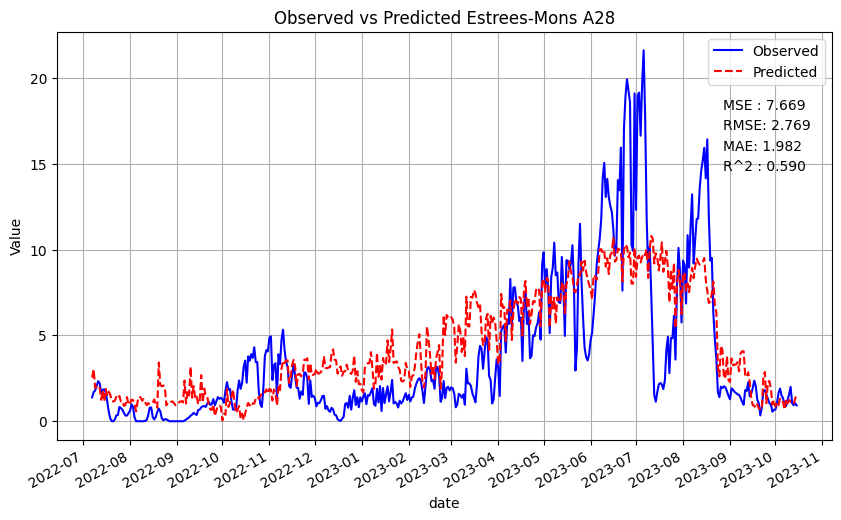

Hohes Holz
Mean Squared Error: 7.044350813723081
Root Mean Squared Error: 2.6541195929579136
MAE: 1.9566714539039933
Test R^2 Score: 0.7620140720398035


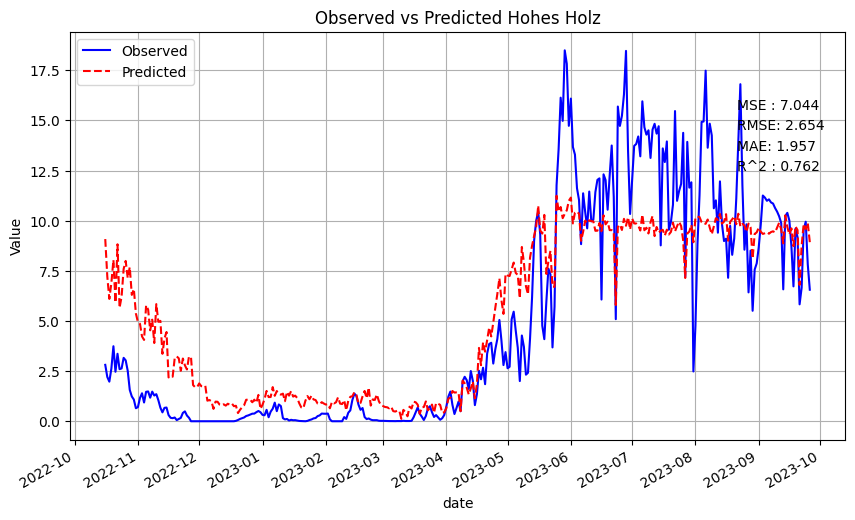

Hyytiala
Mean Squared Error: 4.769703115476459
Root Mean Squared Error: 2.183964998683921
MAE: 1.8498623255123605
Test R^2 Score: 0.5683290472428284


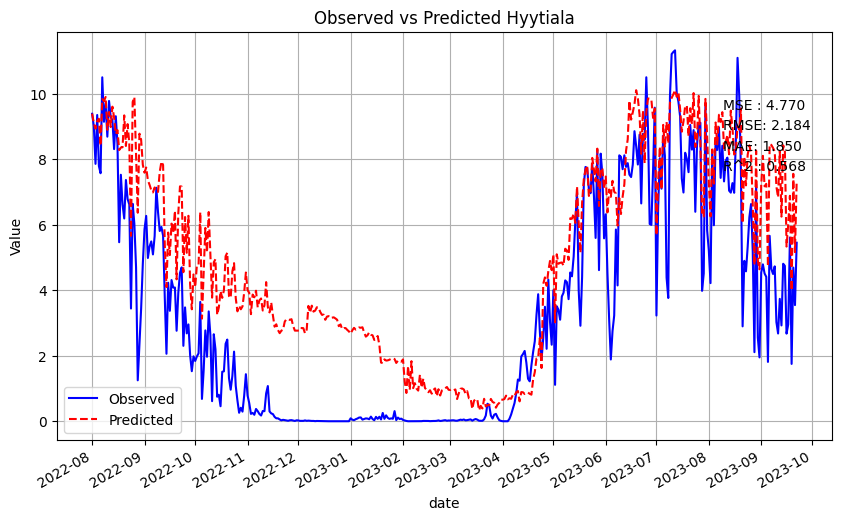

Torgnon
Mean Squared Error: 1.0354483802963281
Root Mean Squared Error: 1.0175698405005567
MAE: 0.5861241015185262
Test R^2 Score: 0.8818497661044075


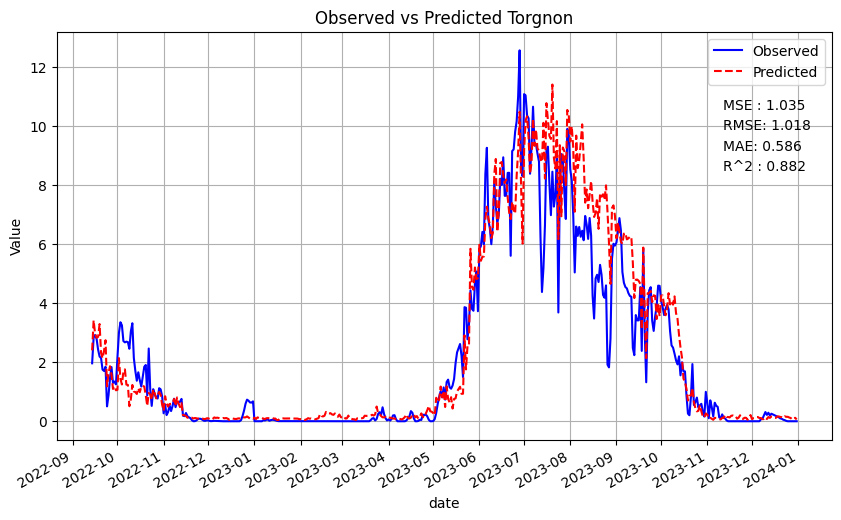

average MSE 5.129678120244029
average RMSE 2.1562470795054636
average MAE 1.5935974697183473
average R2 0.7006093928896935
Mean Squared Error: 7.010887217546346
Root Mean Squared Error: 2.6478080023948762
MAE: 2.169188281177406
Test R^2 Score: 0.6681959965279184


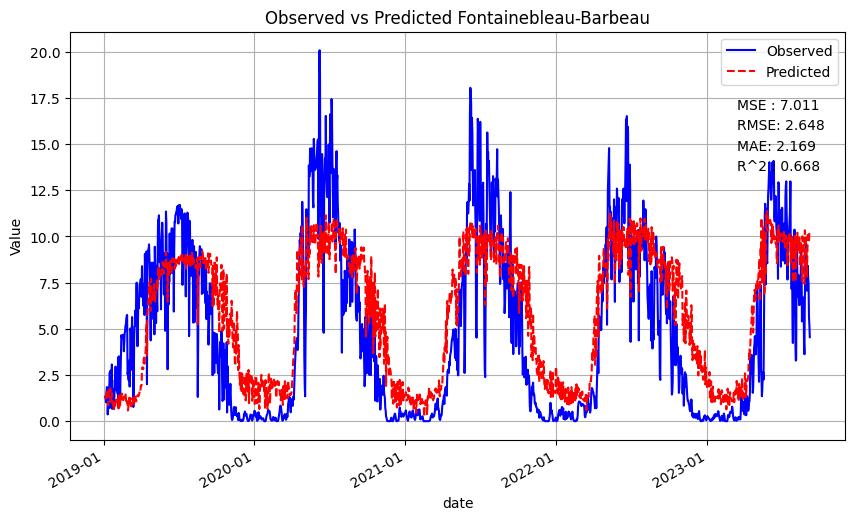

Mean Squared Error: 7.964564135762367
Root Mean Squared Error: 2.822155937534701
MAE: 2.243109424285924
Test R^2 Score: 0.46864506197791334


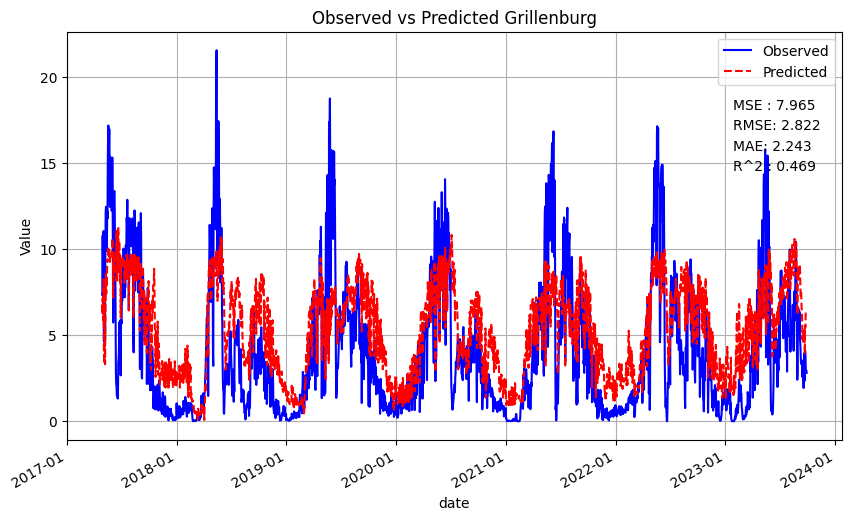

Mean Squared Error: 6.932499642925979
Root Mean Squared Error: 2.632964041327944
MAE: 1.6707181600318461
Test R^2 Score: 0.6136343769565649


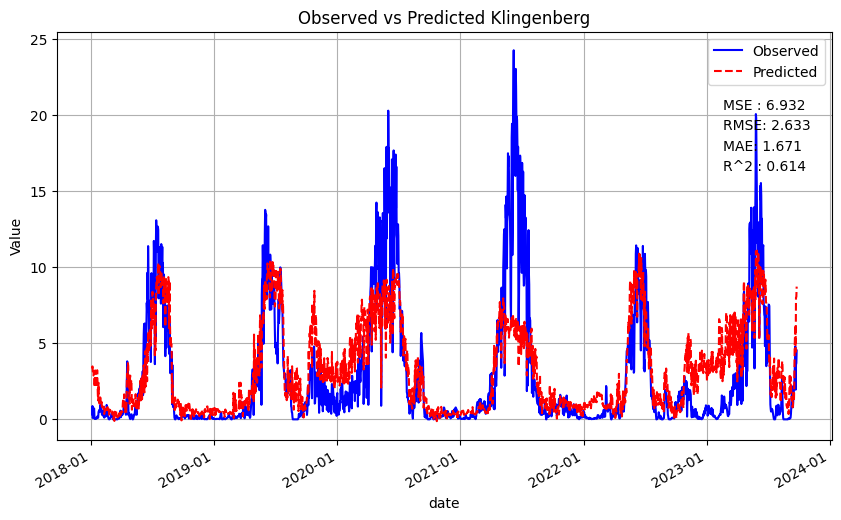

Mean Squared Error: 11.050387002417414
Root Mean Squared Error: 3.3242122378719166
MAE: 2.9661880328847645
Test R^2 Score: 0.06819789201429383


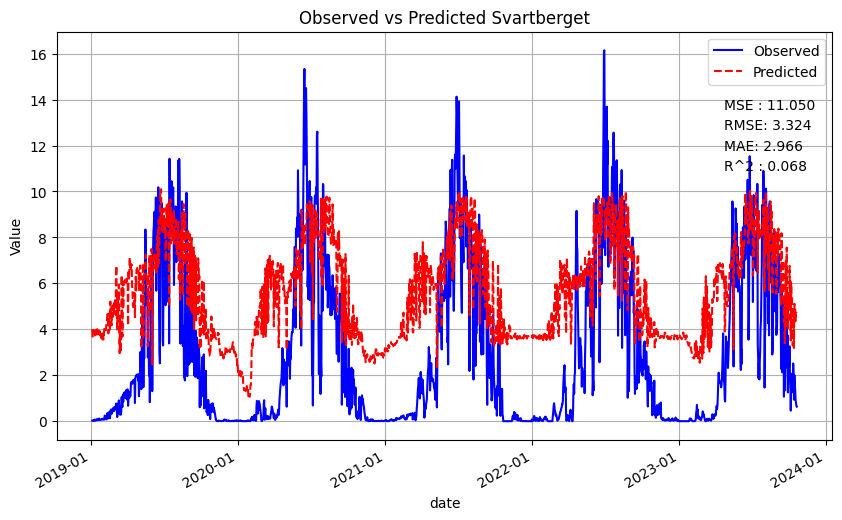

average MSE 8.239584499663026
average RMSE 2.85678505478236
average MAE 2.2623009745949854
average R2 0.4546683318691726


In [12]:
# Columns used for features
column = col2

# Parameters needed for XGBOOST
# Number of lag features
L = 5  
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

# training sites
files =['Estrees-Mons A28_preprocessed_26052017_15102023.csv',
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv']


params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}_L_{L}"
print(params)
model, features = retrain_XGBOOST(files,column, L, target_col, eta, max_depth, min_child_weight, gamma, alpha,plot_directory, params)
predict_all(model,params,L,col2)